# Exploratory Data Analysis (EDA)

Exploratory notebook to understand features and their relationship to the target variable.

In [2]:
%reload_ext autoreload
%autoreload 1

In [3]:
from pathlib import Path
from typing import List

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.process import load_train_test

In [4]:
import warnings
warnings.simplefilter("ignore")

### Global Params

In [5]:
LABEL = "target"
SAVE_PLOTS = True  # If true save plots as .png files in PLOT_DIR
PLOT_DIR = Path("data").joinpath("plots")

In [6]:
train, test = load_train_test()
full = pd.concat([train, test])

#### Naive Summary Statistics

- What % of Drivers file a claim
- How many missing values
- mean, quartiles, std, etc.

In [7]:
full[LABEL].value_counts()

0.0    573518
1.0     21694
Name: target, dtype: int64

In [8]:
full[LABEL].value_counts(normalize=True)

0.0    0.963552
1.0    0.036448
Name: target, dtype: float64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [10]:
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Categorize Features

- Create lists of features by dtypes:
    - categorical
    - float
    - calculated (perhaps noise features)

In [11]:
features = full.columns.tolist()

cat_features = [c for c in features if 'cat' in c]
num_features = [c for c in features if ("cat" not in c and "calc" not in c)]
ind_features = [c for c in features if "ind" in c]
calc_features = [c for c in features if "calc" in c]
binary_features = [f for f in features if full[f].nunique() == 2 and f != LABEL]

remain_features = [f for f in features if f not in cat_features + calc_features + ind_features + [LABEL, "id"]]
float_features = full.select_dtypes(include=["float"]).drop(LABEL, 1).columns.tolist()

## Check Feature Distributions
- Compare by Feature type
- Compare train vs. test for shifts
- Compare relationship to LABEL

#### Categorical [distplot]

- Check for shifts between category counts in train/test data
- Distributions appear constant

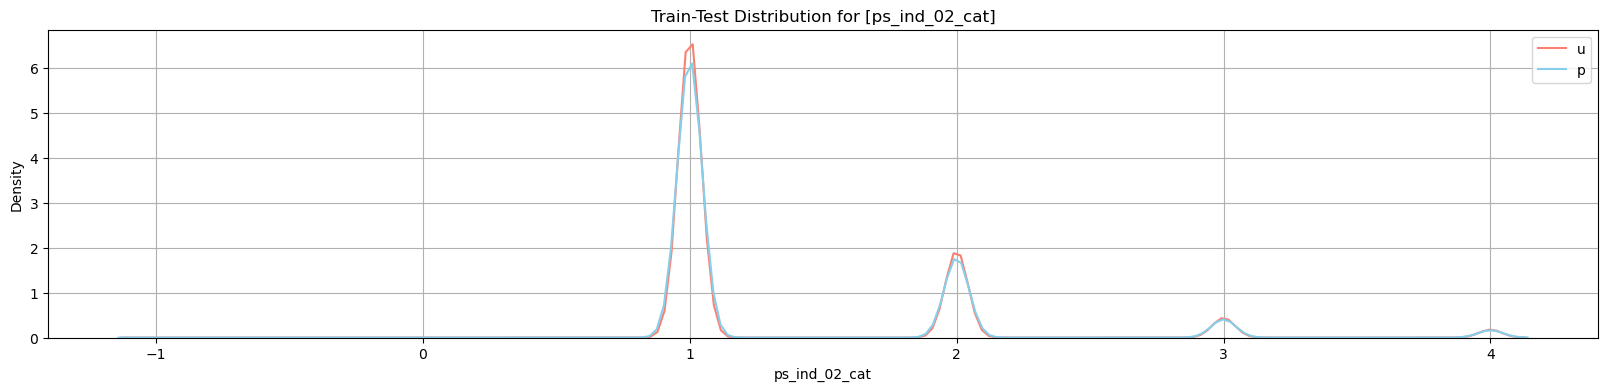

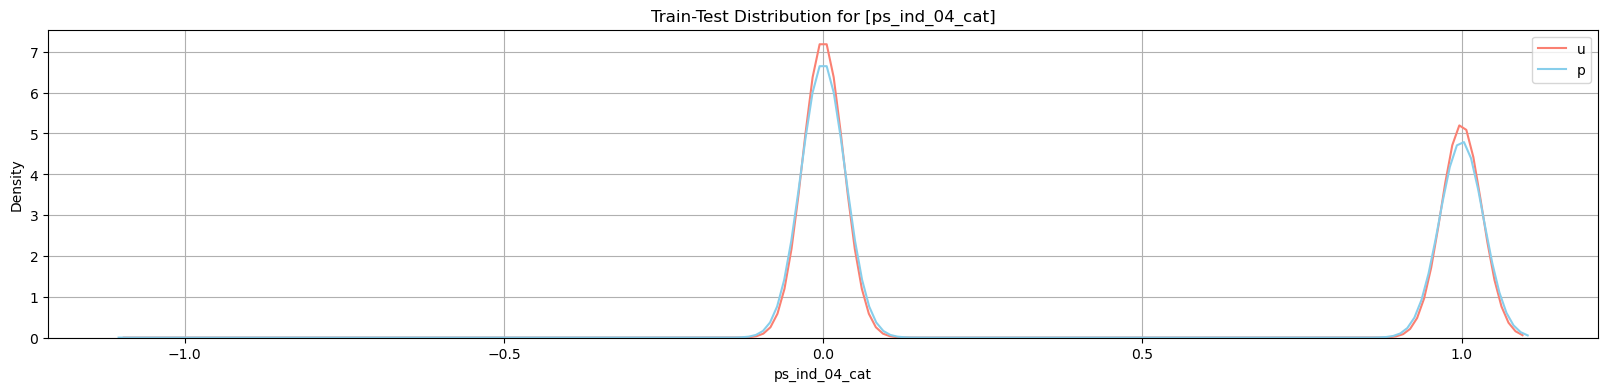

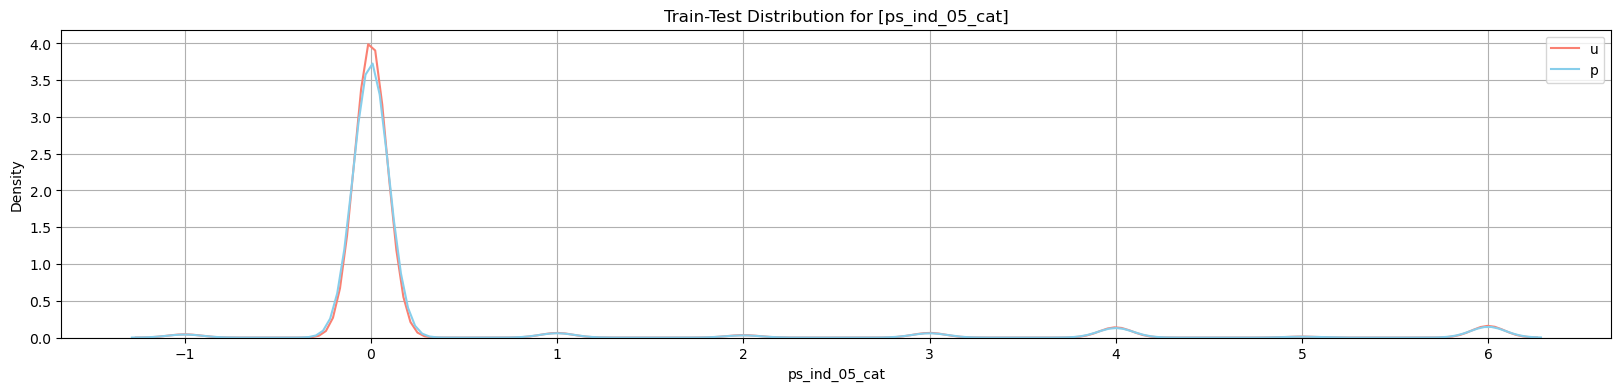

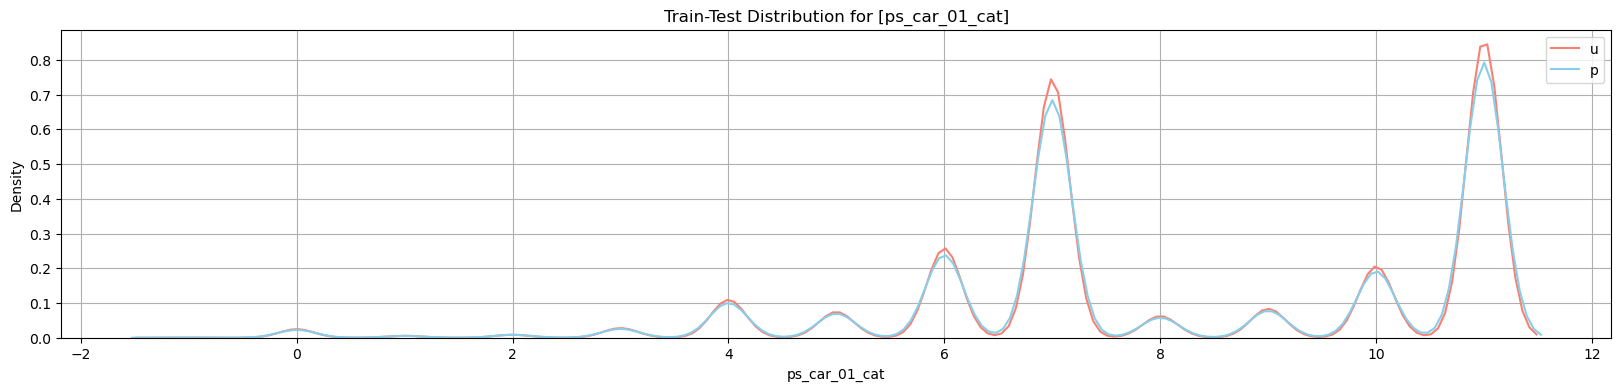

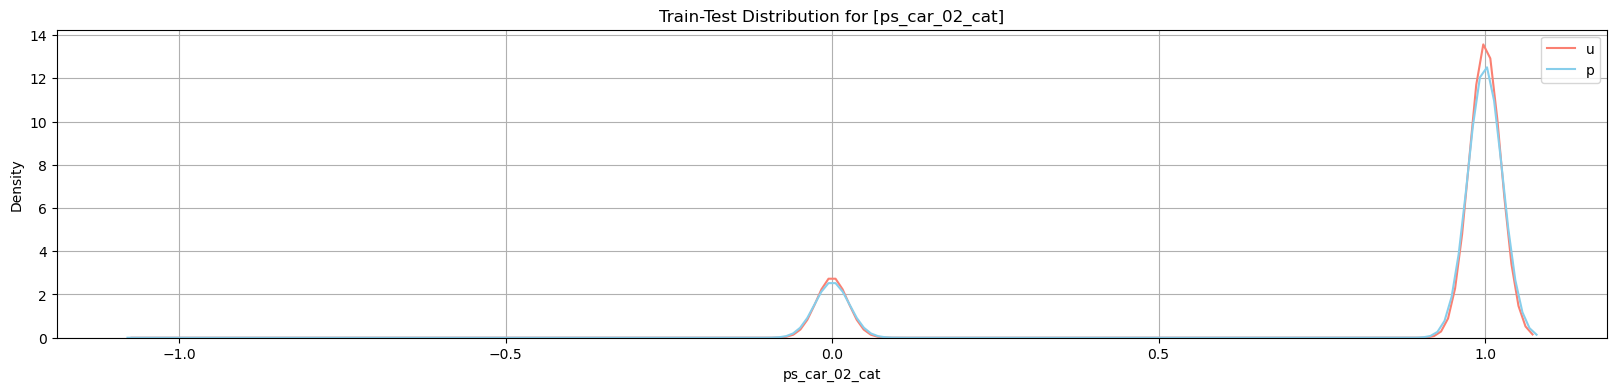

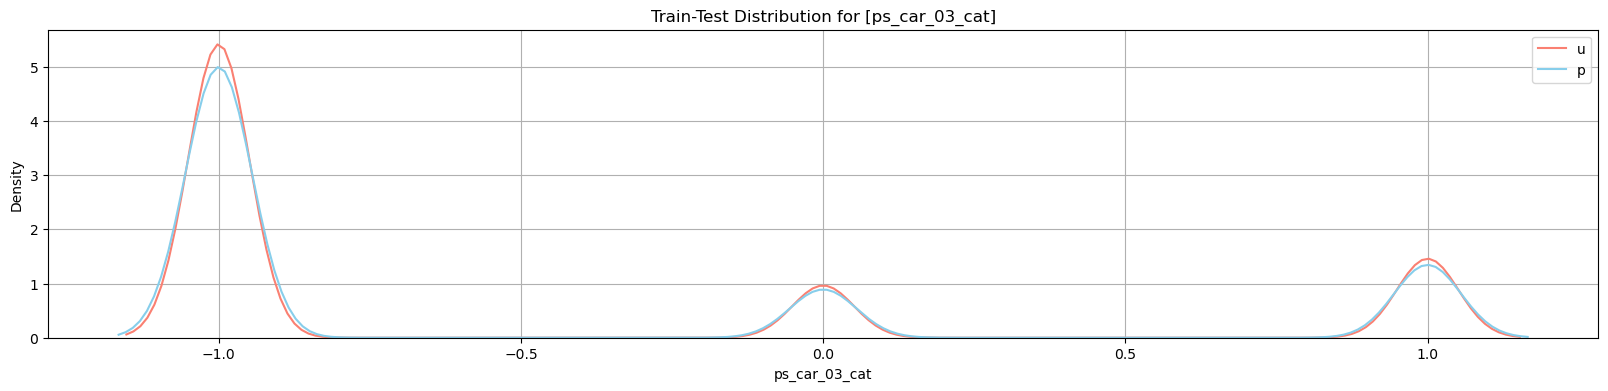

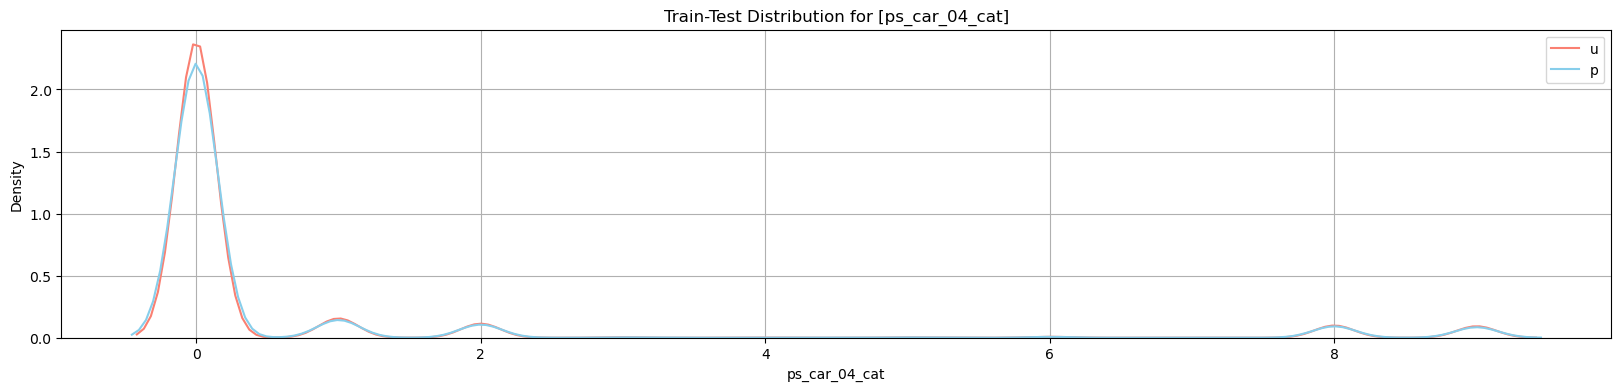

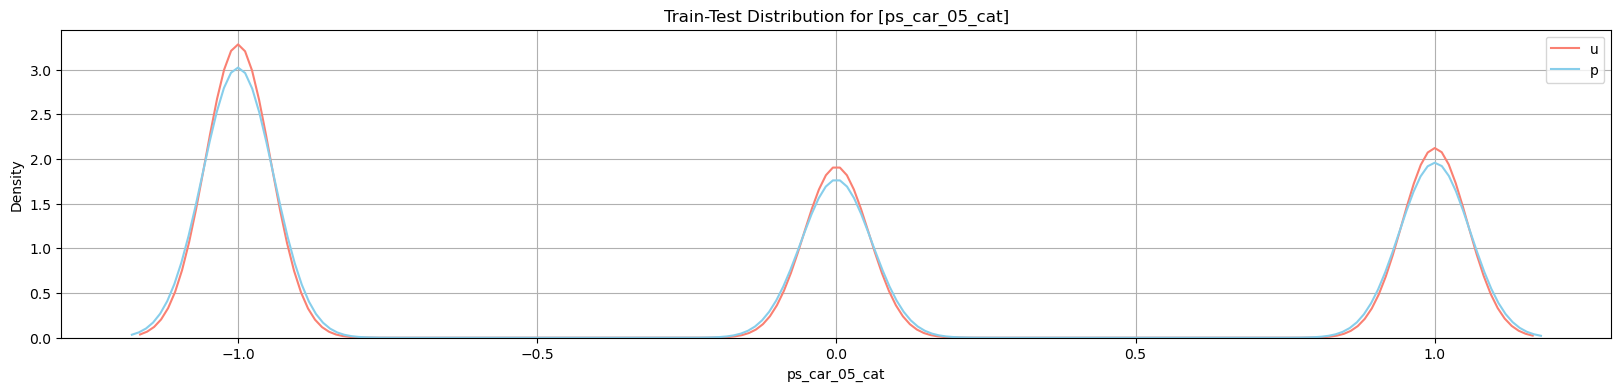

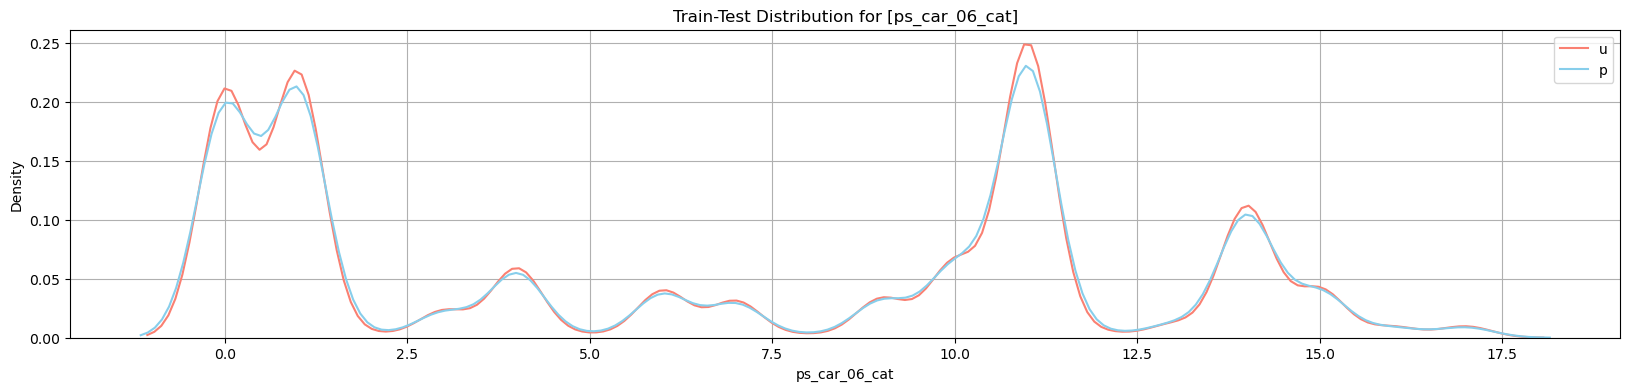

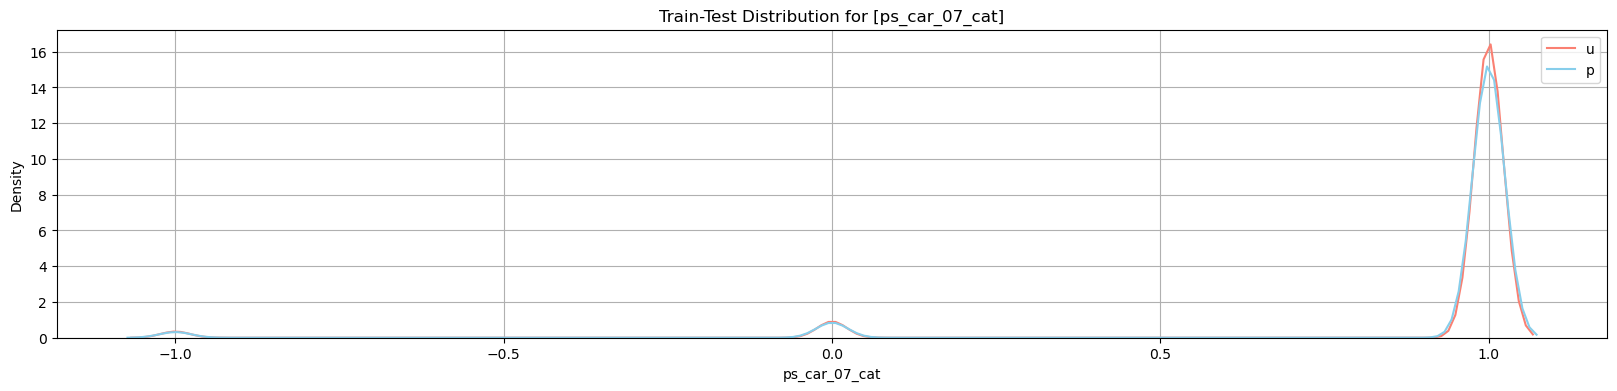

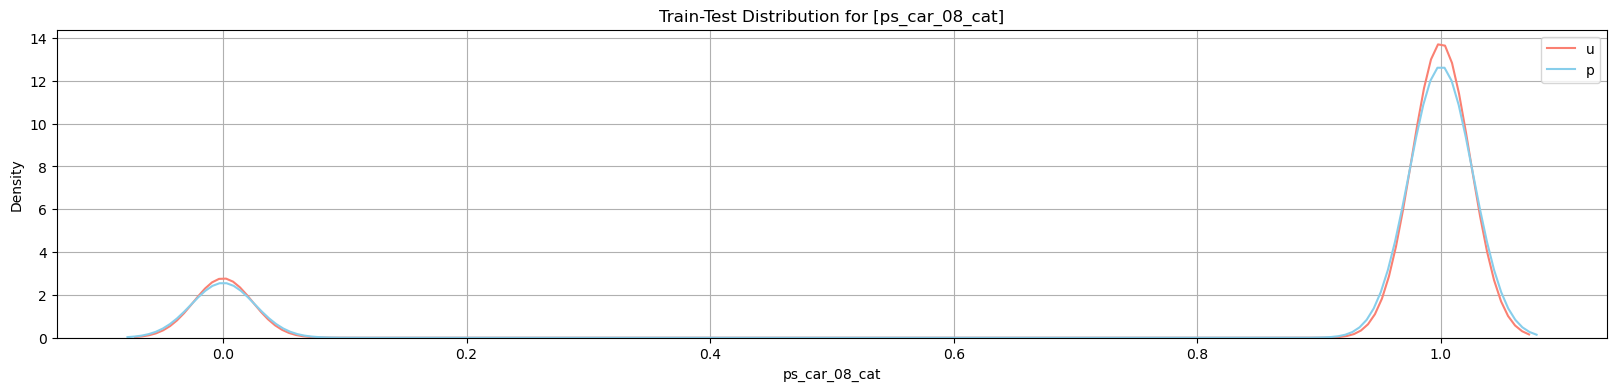

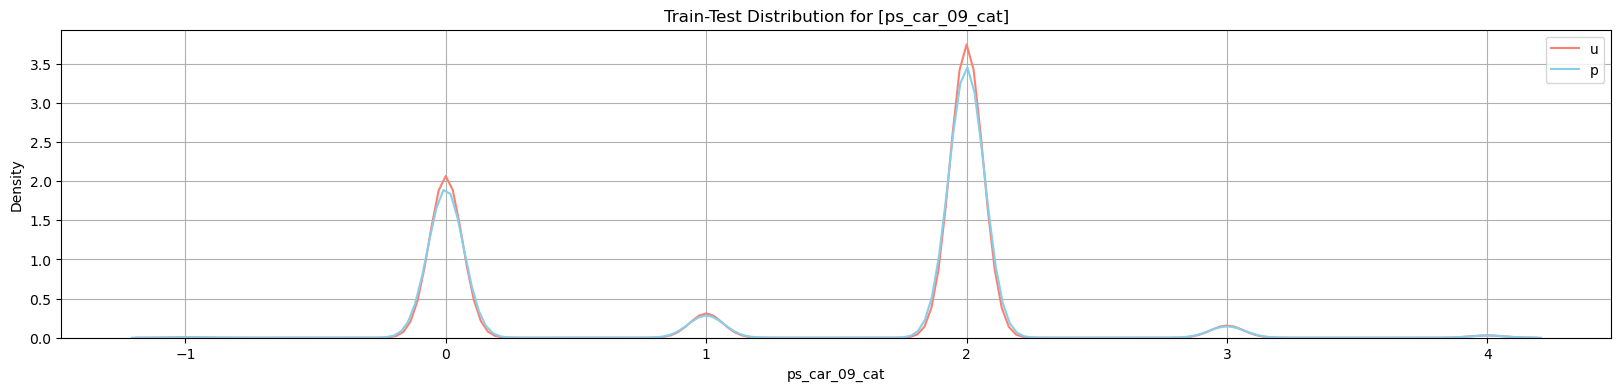

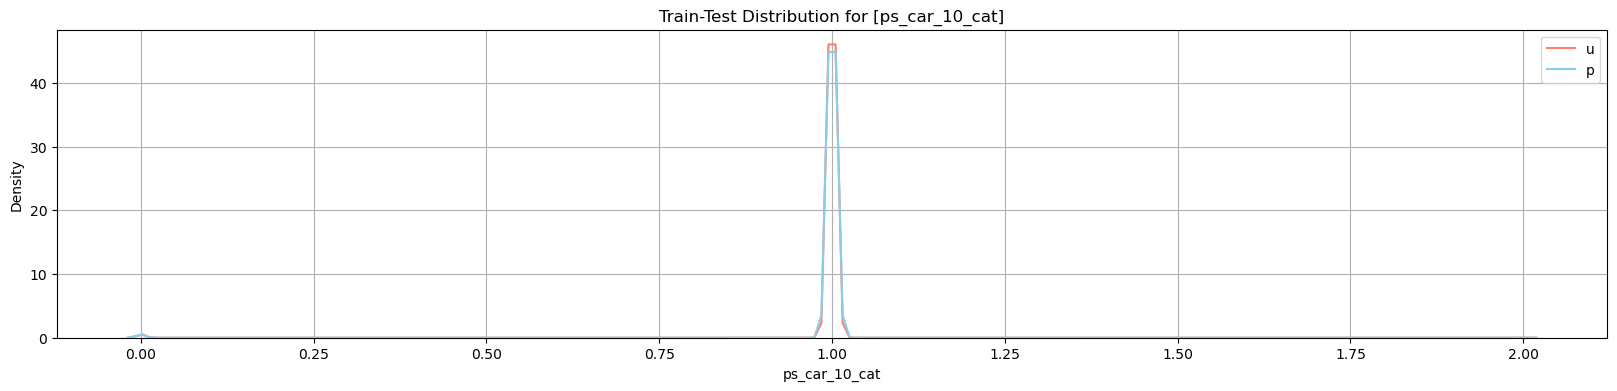

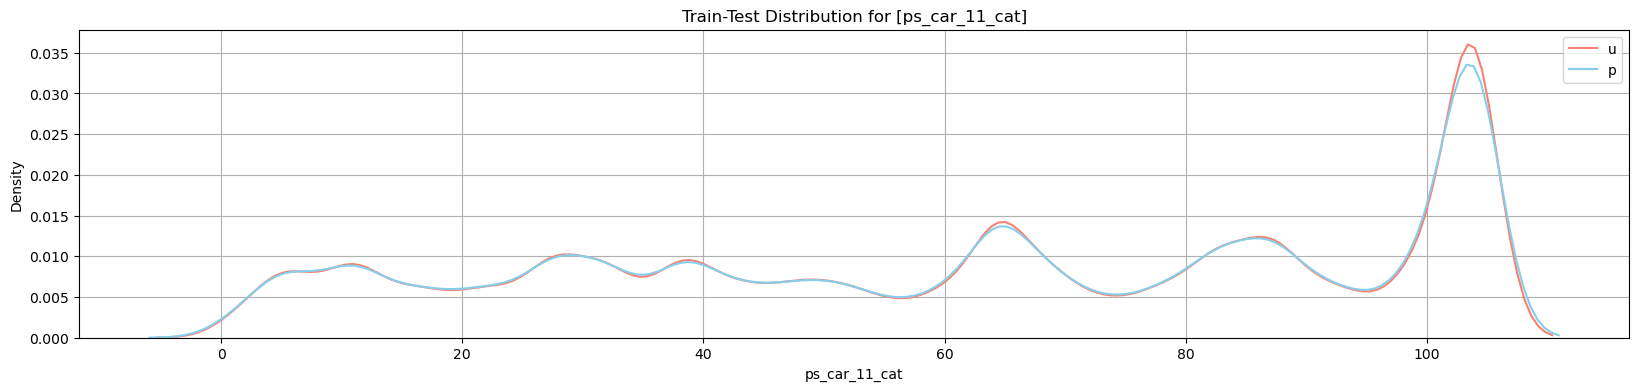

In [12]:
for col in cat_features:
    f, ax = plt.subplots(1,1,figsize=(20, 4))
    g = sns.distplot(full[full[LABEL].isnull()][col], ax=ax, kde=True, hist=False, color="salmon", label="Test")
    g = sns.distplot(full[~full[LABEL].isnull()][col], ax=ax, kde=True, hist=False, color="skyblue", label="Train")
    ax.grid()
    plt.title(f"Train-Test Distribution for [{col}]")
    ax.legend("upper right")
    
    if SAVE_PLOTS:
        plt.savefig(PLOT_DIR.joinpath(f"category-train_test_distributions_{col}.png"))
    else:
        plt.show()

#### Continuous Features [correlation matrix, scatter plots]

- Check for linear correlation amongst features and with LABEL
- Collinearity isn't an issue in the feature space since I'm using a tree model
- The LABEL does not appear to be strongly linearly correlated with any predictors

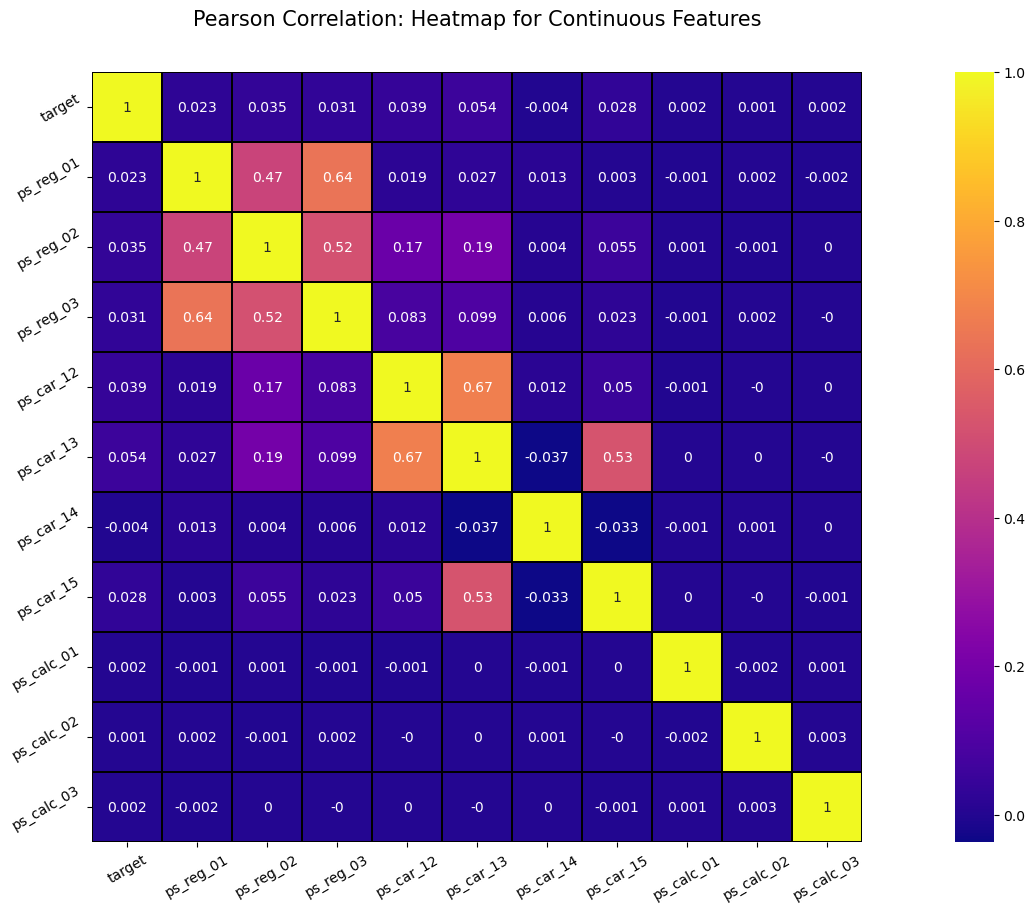

In [13]:
corr_columns = ["target"] + train.select_dtypes(include="float").columns.tolist()

f, ax = plt.subplots(figsize=(24 , 10))
plt.title('Pearson Correlation: Heatmap for Continuous Features', y=1.05, size=15)

sns.heatmap(train[corr_columns].corr().round(3),
            linewidths=0.1,
            vmax=1.0,
            square=True, 
            cmap=plt.cm.plasma,
            linecolor='black',
            annot=True,
           ax=ax)
ax.set_yticklabels(corr_columns, rotation=30)
ax.set_xticklabels(corr_columns, rotation=30)
plt.savefig(PLOT_DIR.joinpath(f"HeatMap-Pearson-Correlation.png"))
plt.show()

### Remain Features (not in cat, calc, ind)
- Show these with violinplots to illustrate density across different values of predictors by LABEL 

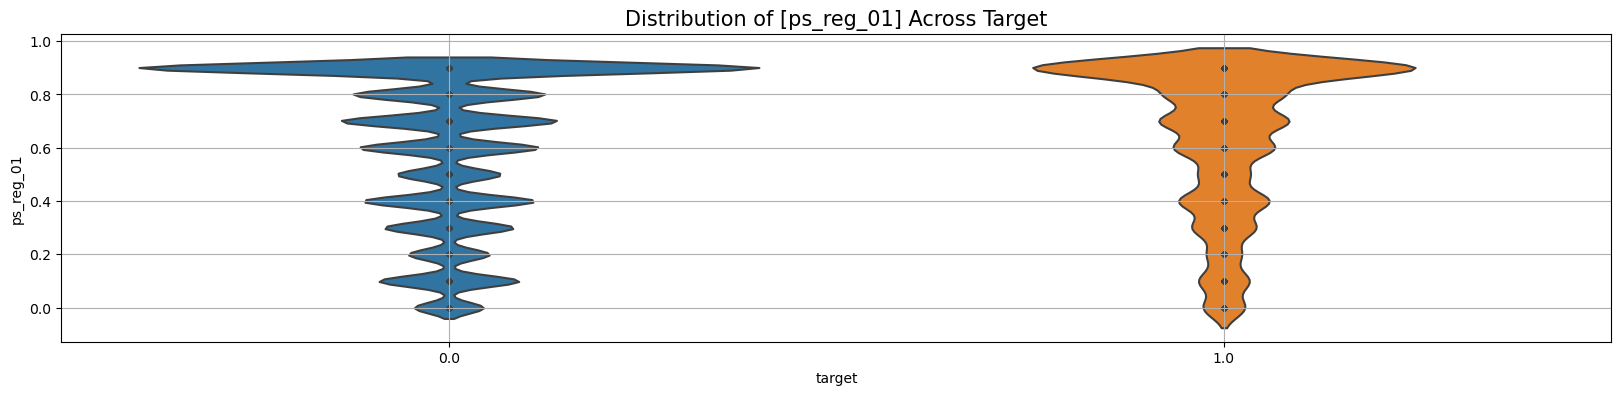

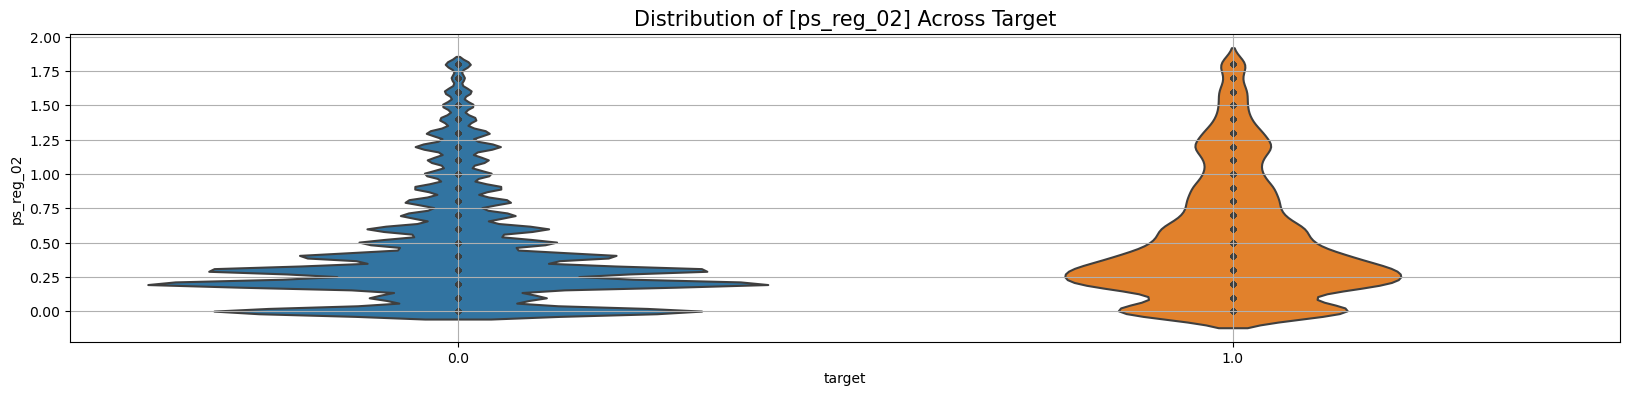

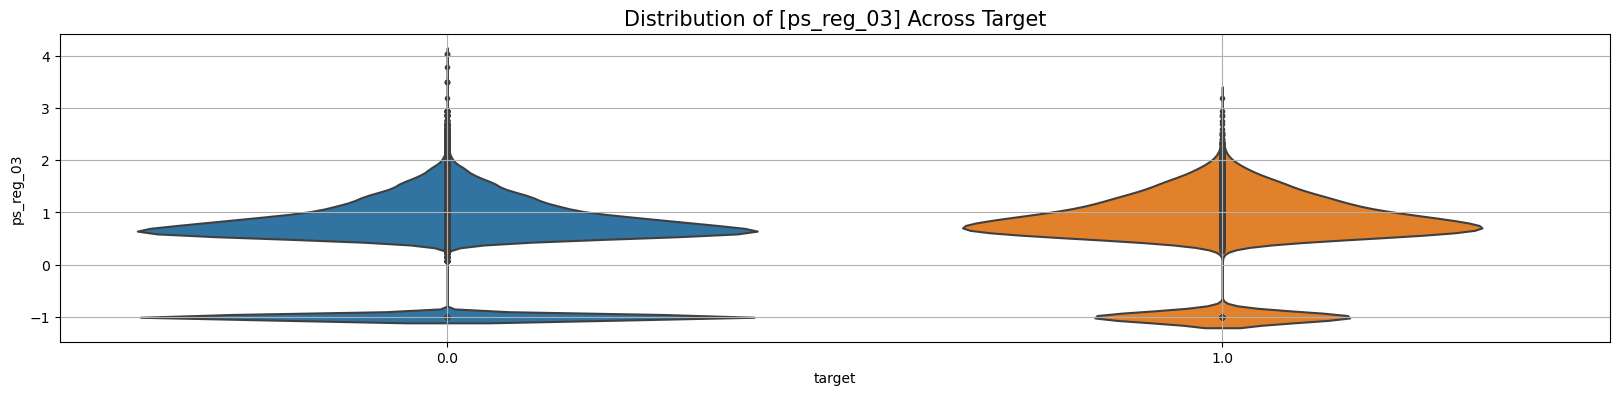

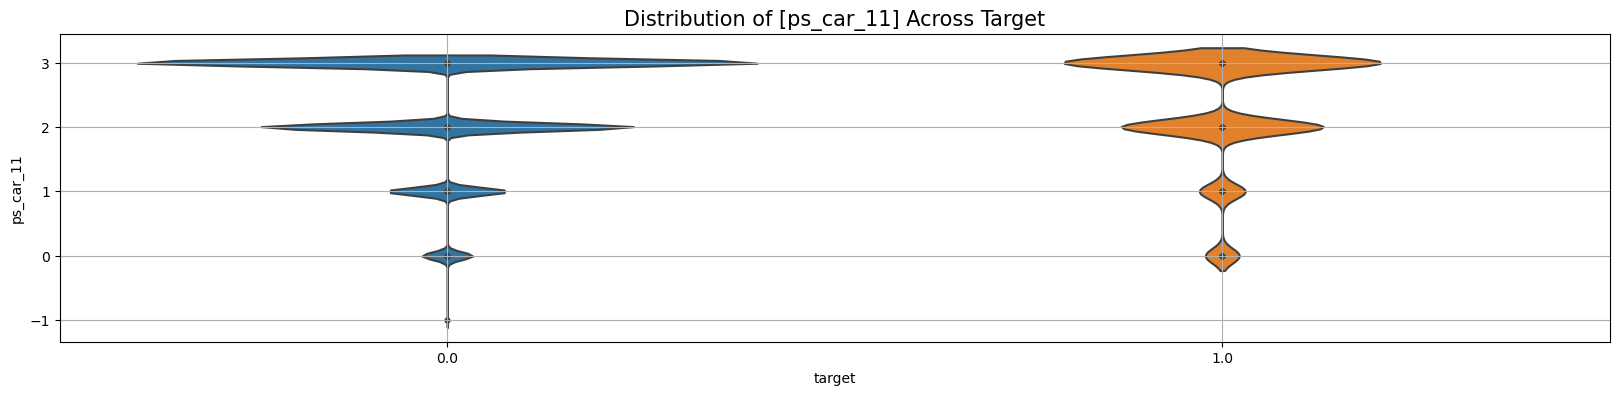

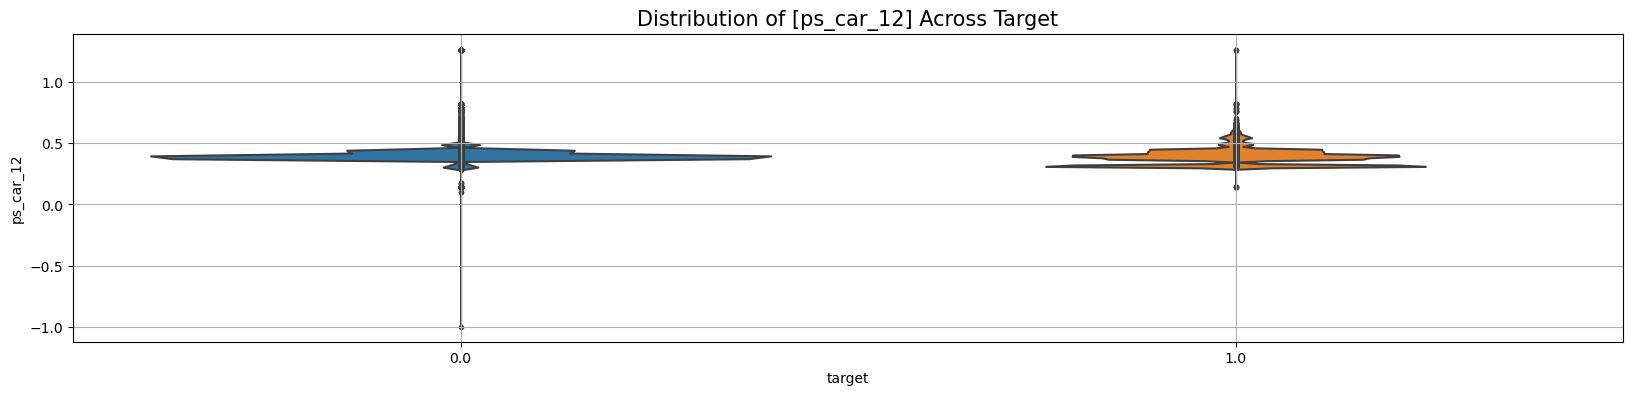

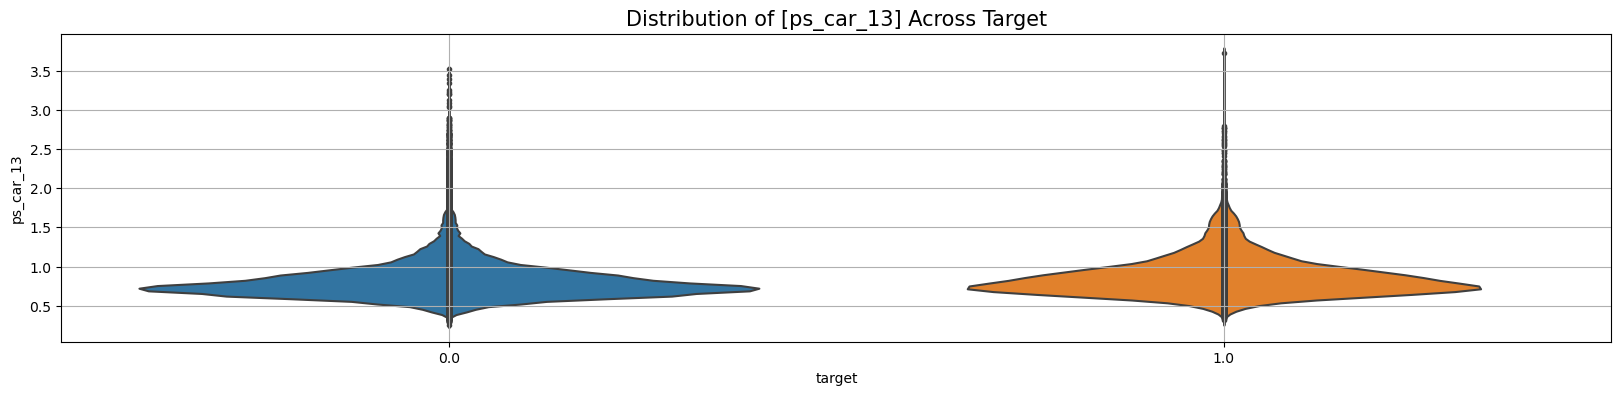

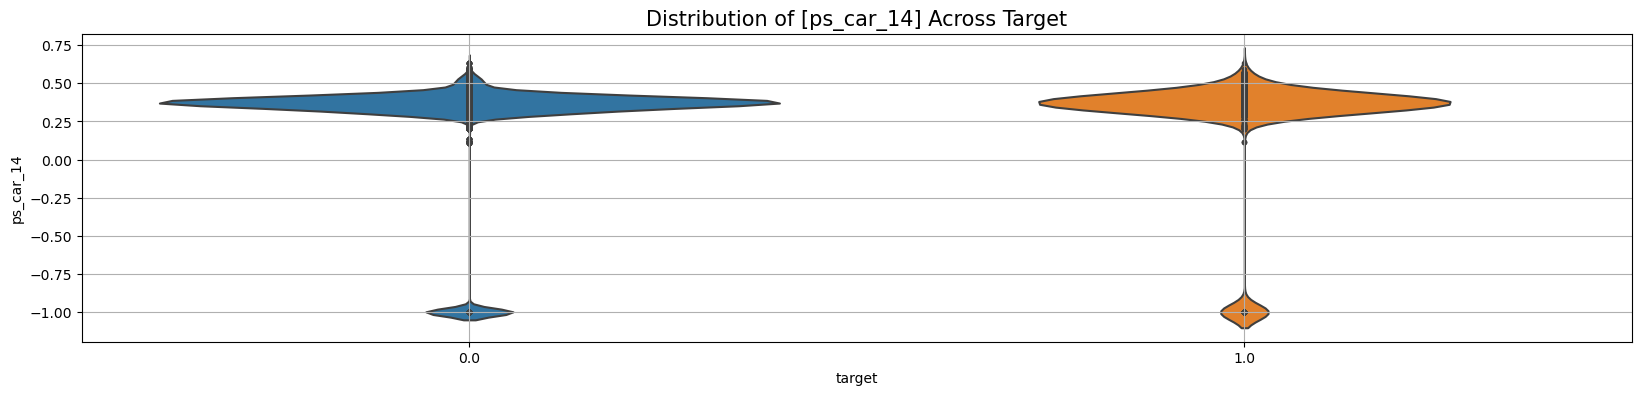

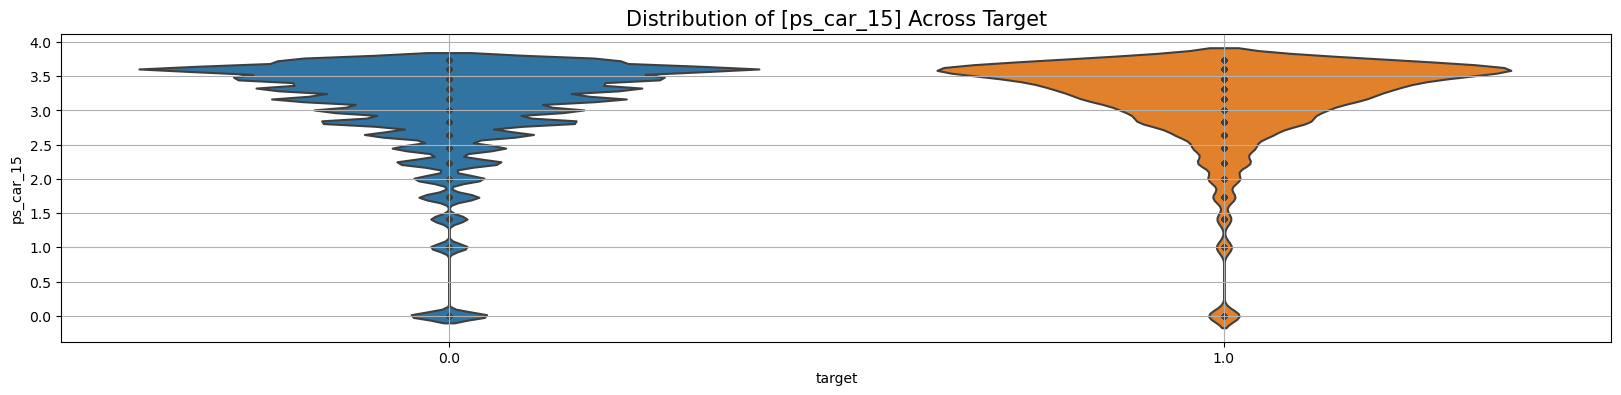

In [14]:
for c in remain_features:
    f, ax = plt.subplots(1,1,figsize=(20, 4))
    g = sns.violinplot(y=c, x=LABEL, data=full, ax=ax, inner="point")
    g.set_title(f"Distribution of [{c}] Across Target",fontsize=15)
    ax.grid()
    if SAVE_PLOTS:
        plt.savefig(PLOT_DIR.joinpath(f"ViolinPlot-{c}.png"))
    plt.show()

### Calculated Features

- These features seem to resemble `Gaussian` noise
- There does not appear to be a strong correlation with the `LABEL`
- Likely safe to remove these

Feature: ps_calc_01    	values: 10
Feature: ps_calc_02    	values: 10
Feature: ps_calc_03    	values: 10
Feature: ps_calc_04    	values: 6
Feature: ps_calc_05    	values: 7
Feature: ps_calc_06    	values: 11
Feature: ps_calc_07    	values: 10
Feature: ps_calc_08    	values: 12
Feature: ps_calc_09    	values: 8
Feature: ps_calc_10    	values: 26
Feature: ps_calc_11    	values: 21
Feature: ps_calc_12    	values: 12
Feature: ps_calc_13    	values: 16
Feature: ps_calc_14    	values: 25
Feature: ps_calc_15_bin	values: 2
Feature: ps_calc_16_bin	values: 2
Feature: ps_calc_17_bin	values: 2
Feature: ps_calc_18_bin	values: 2
Feature: ps_calc_19_bin	values: 2
Feature: ps_calc_20_bin	values: 2


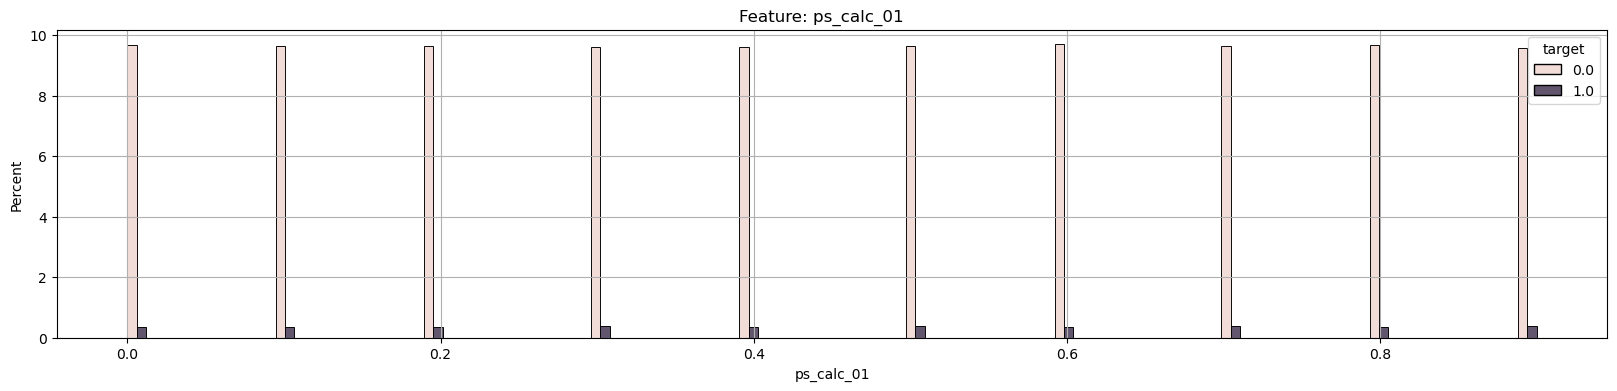

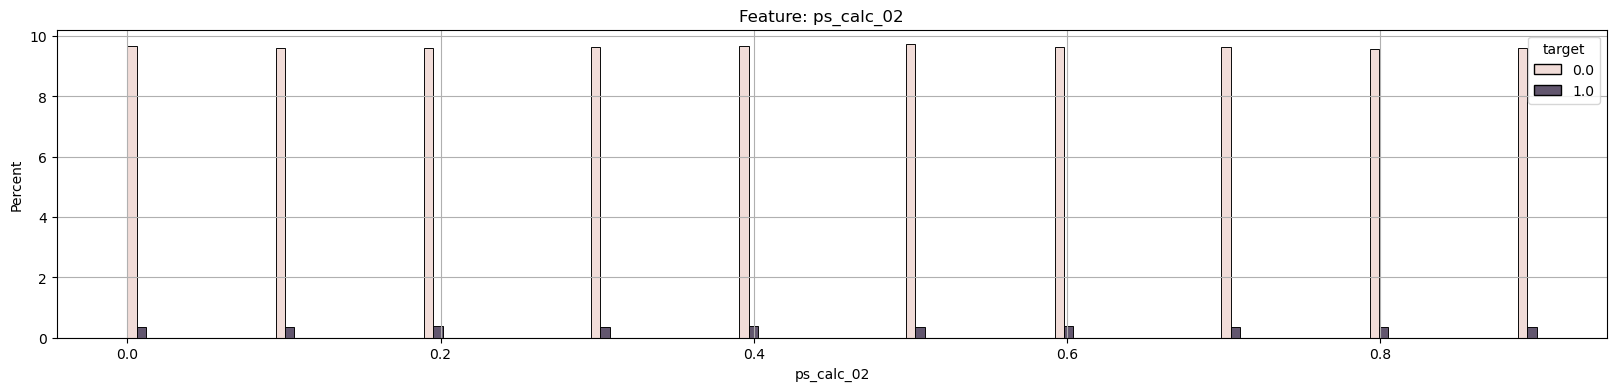

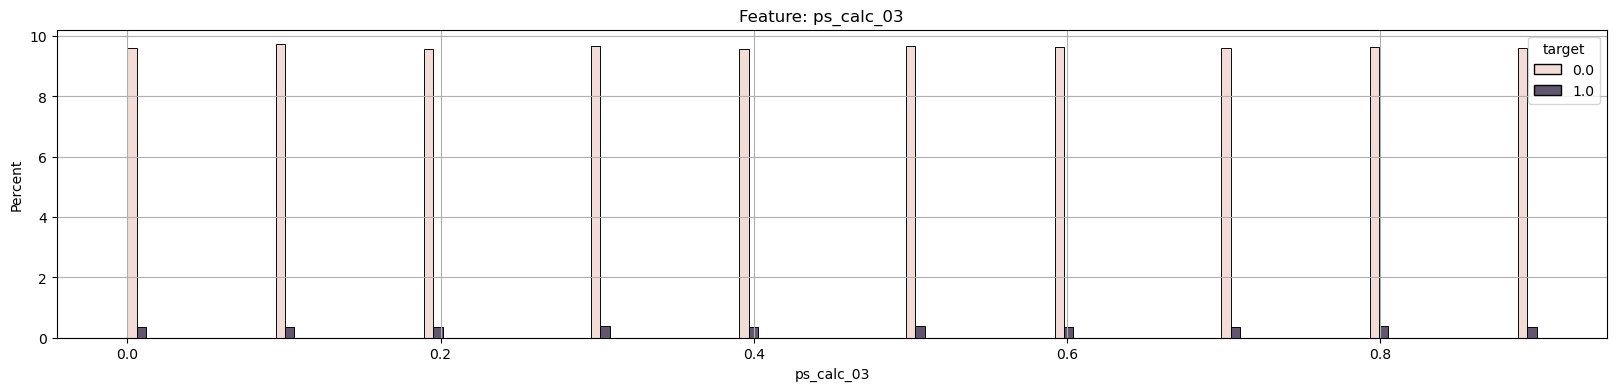

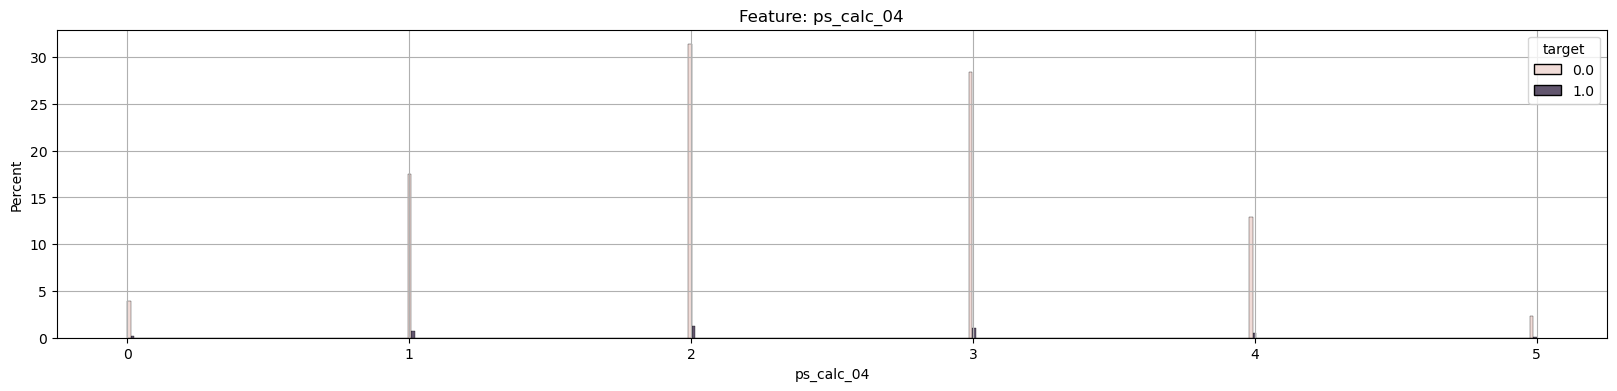

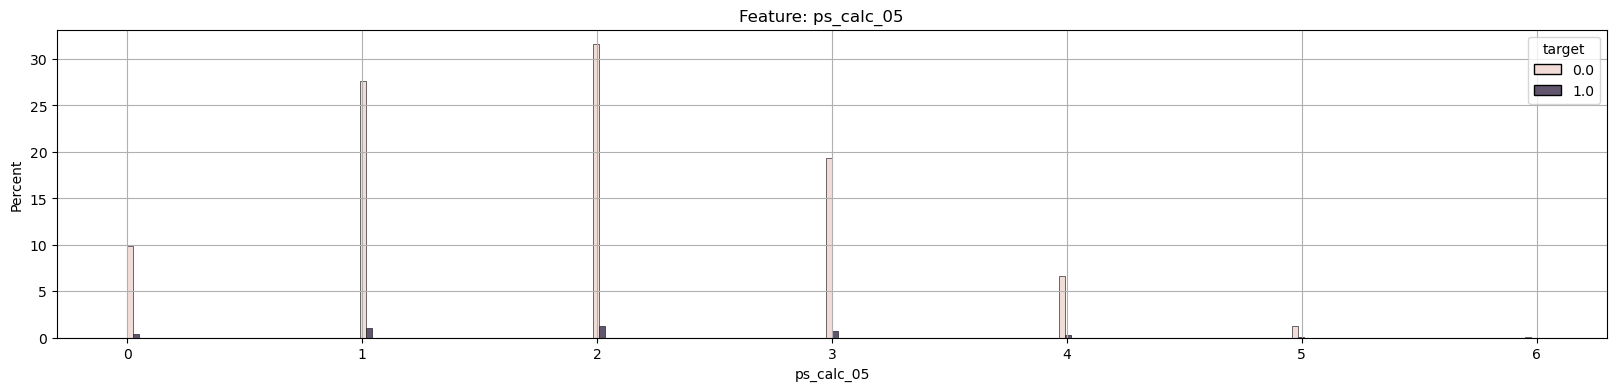

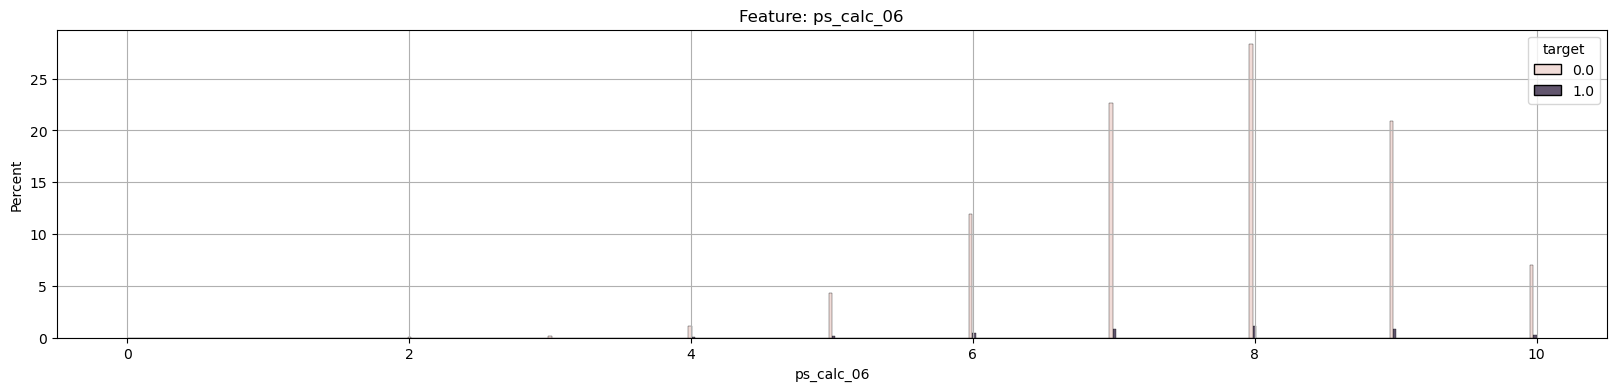

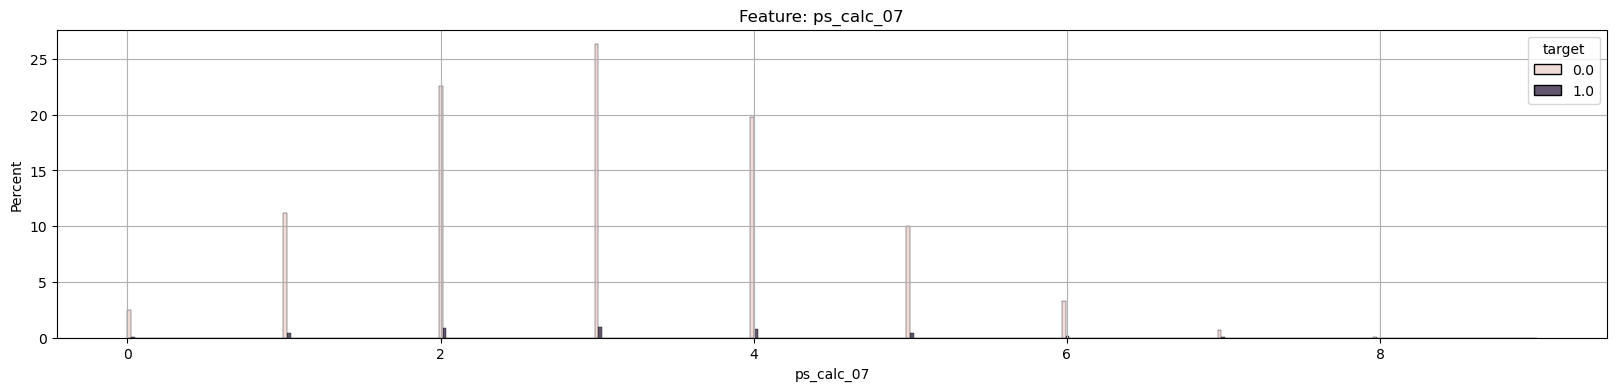

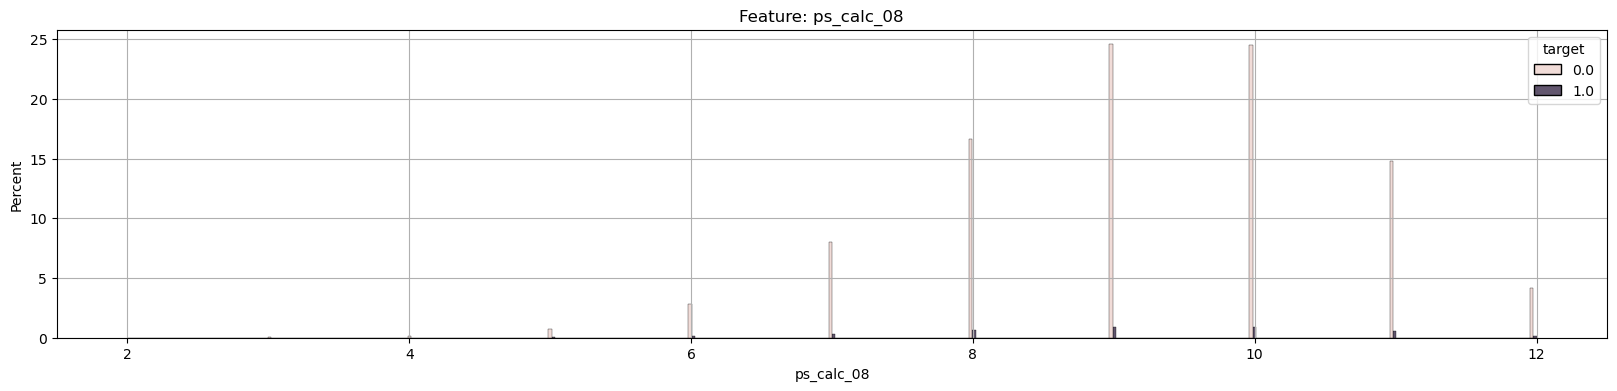

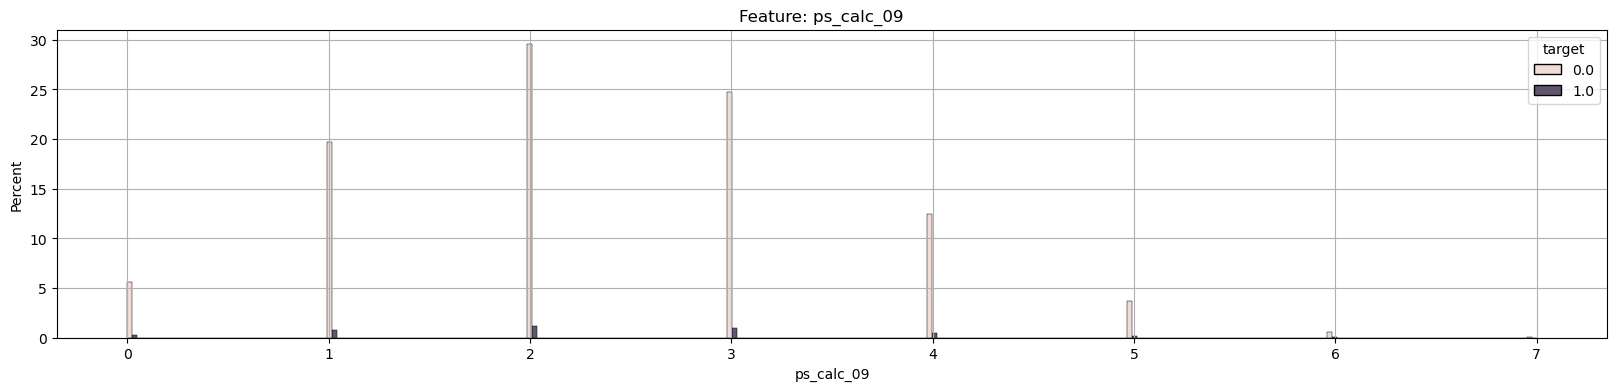

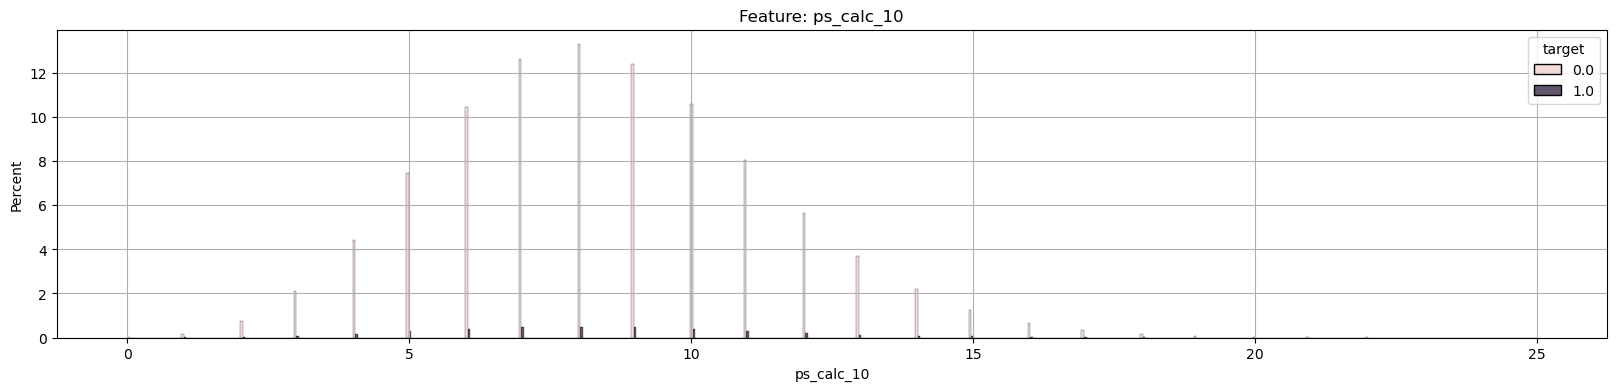

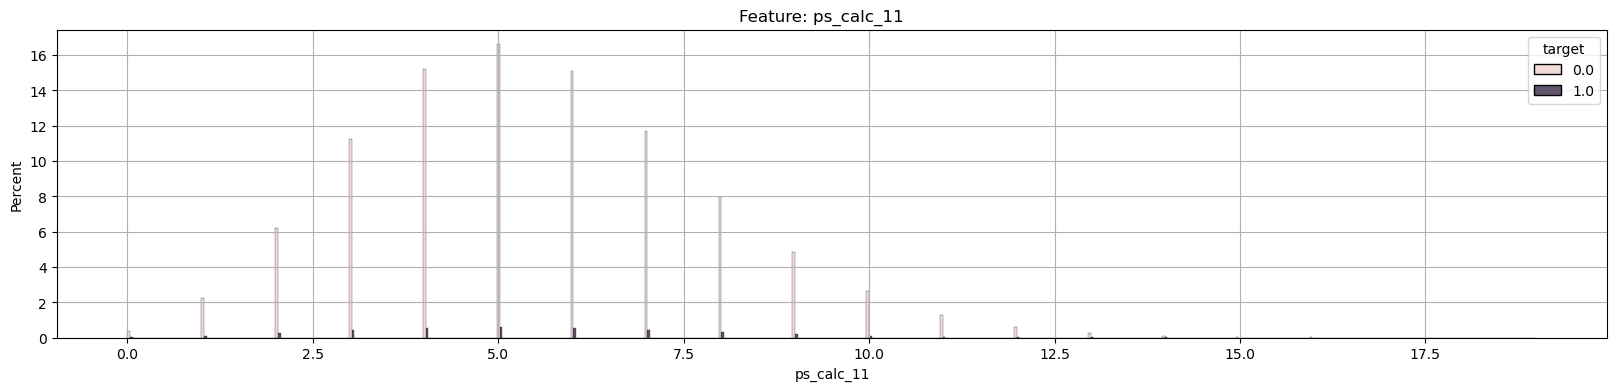

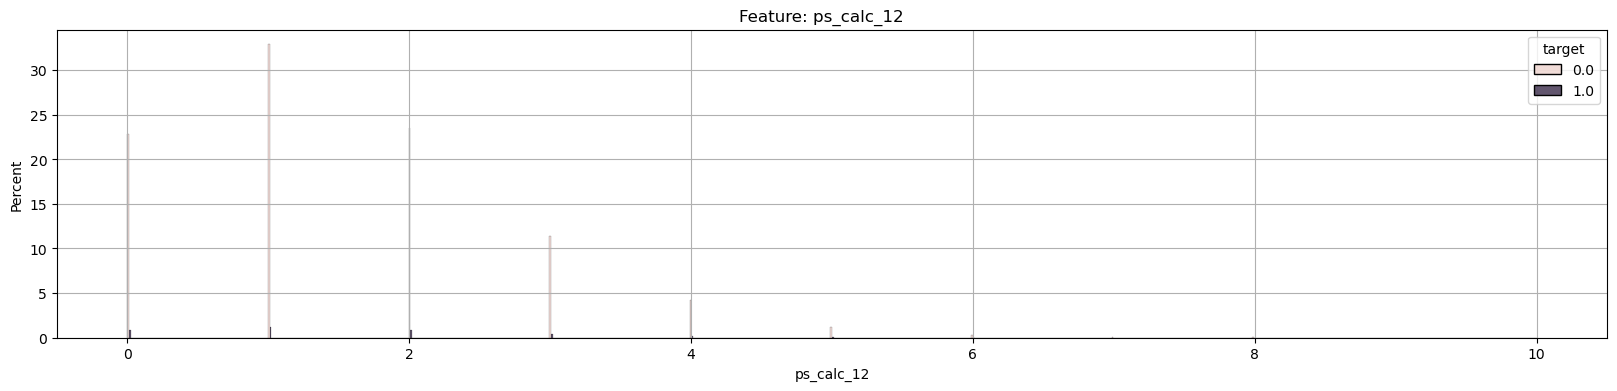

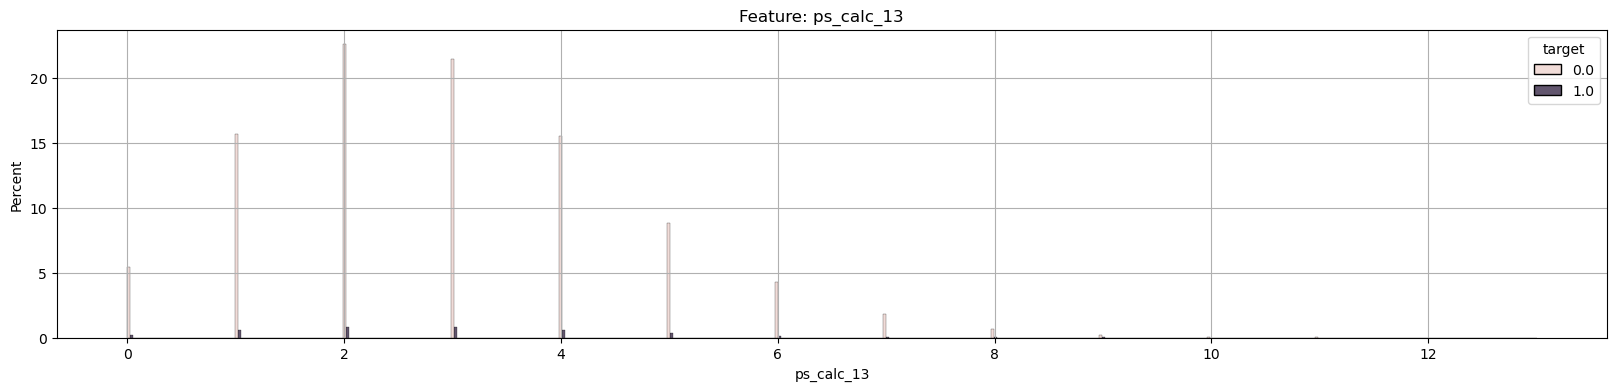

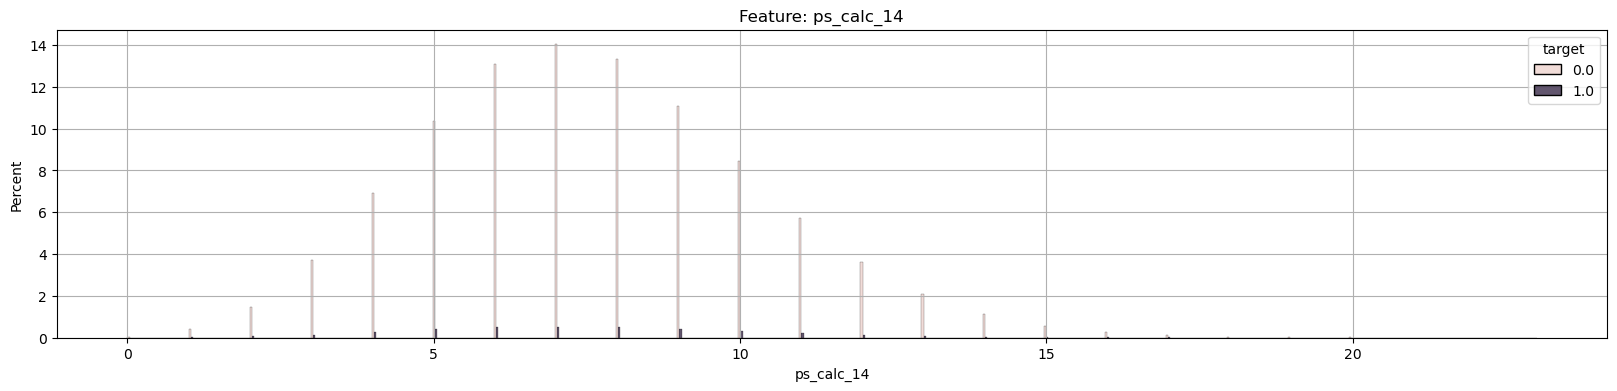

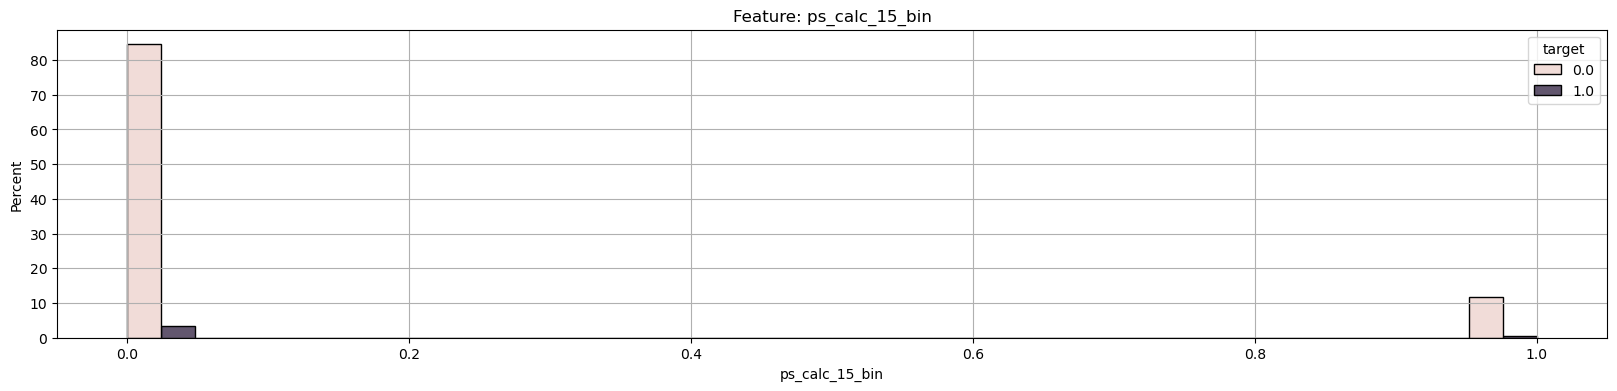

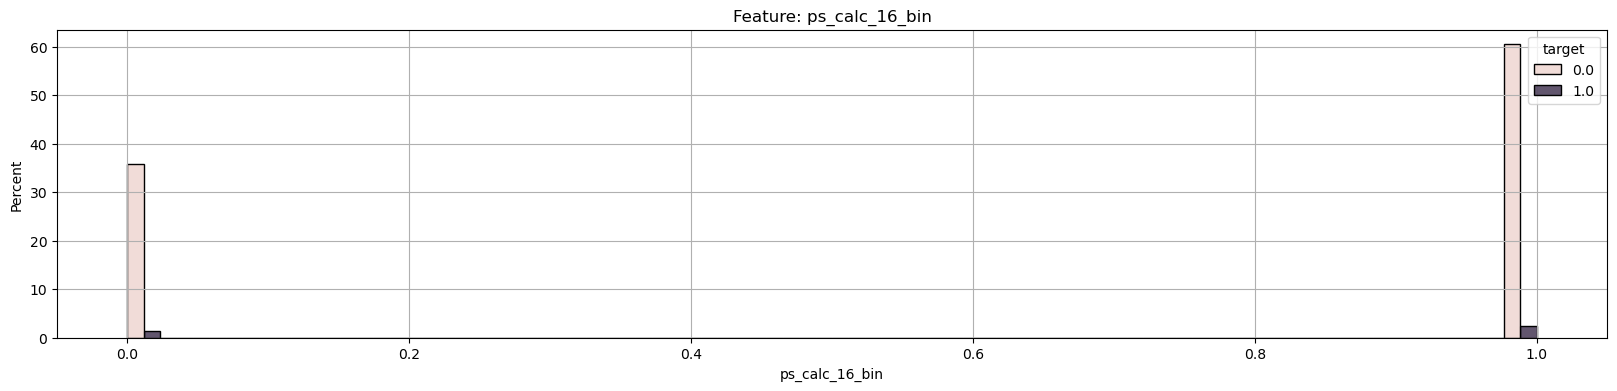

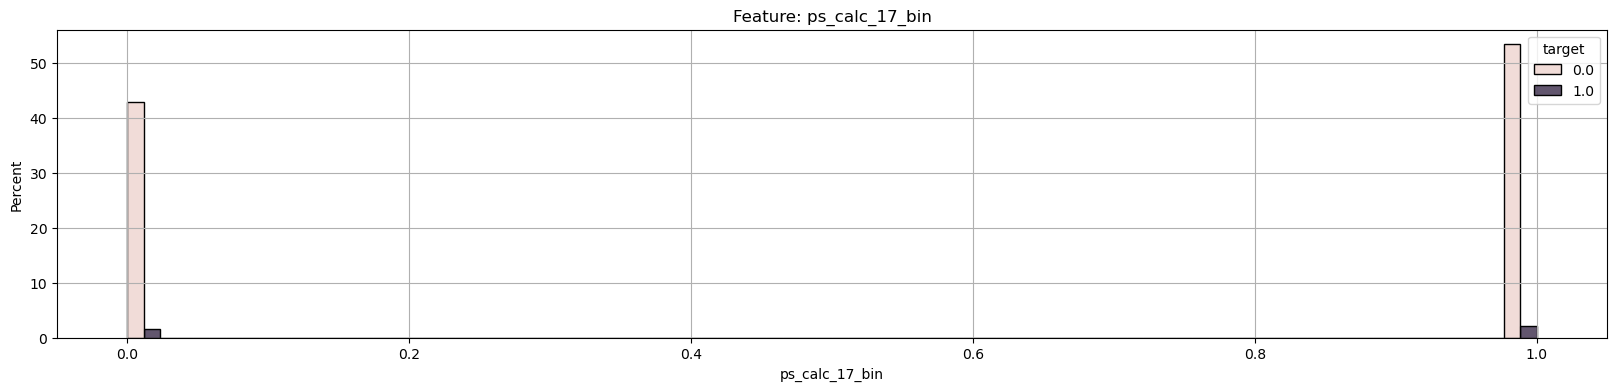

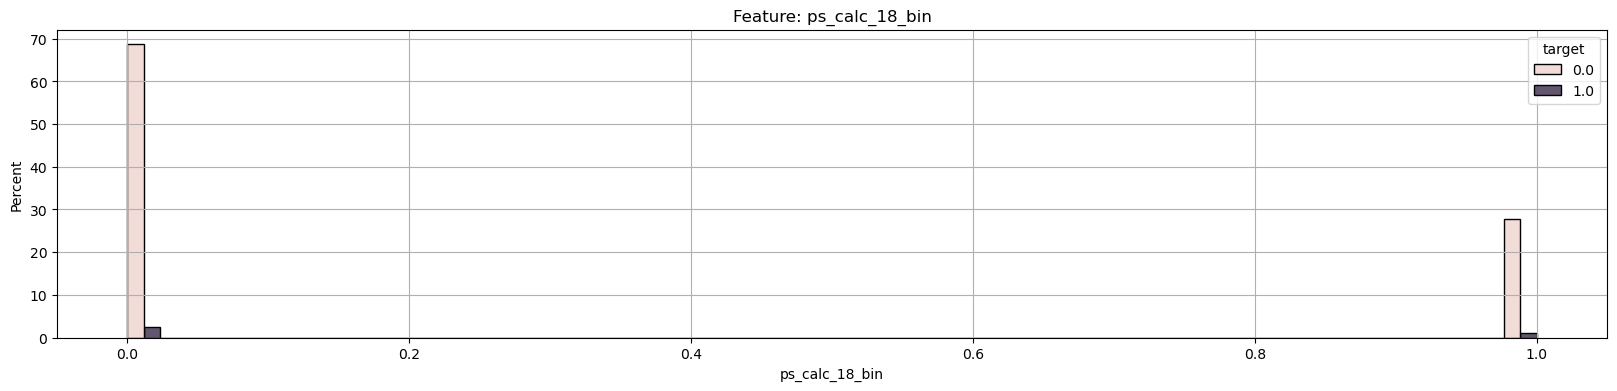

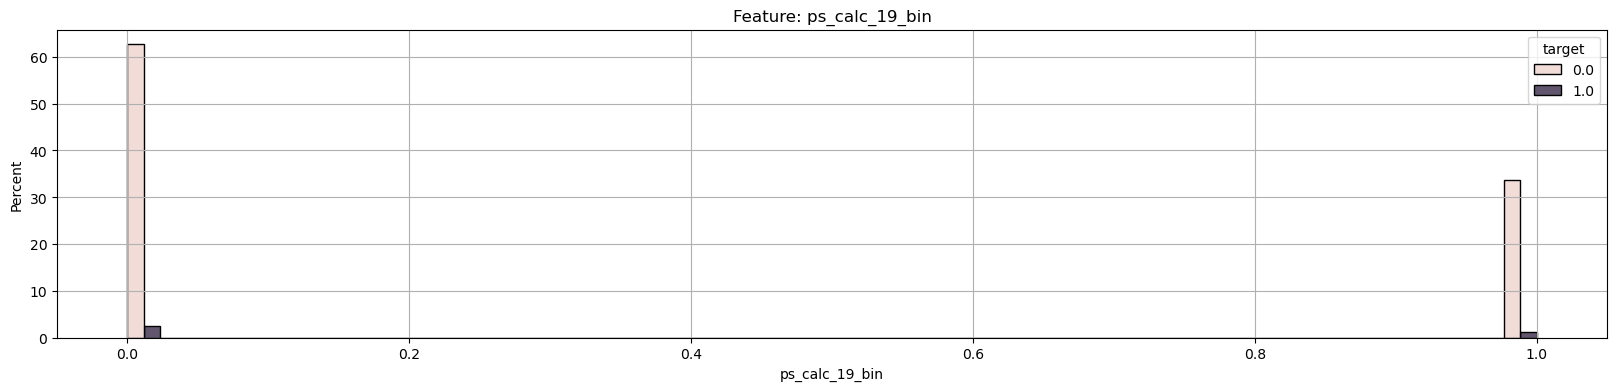

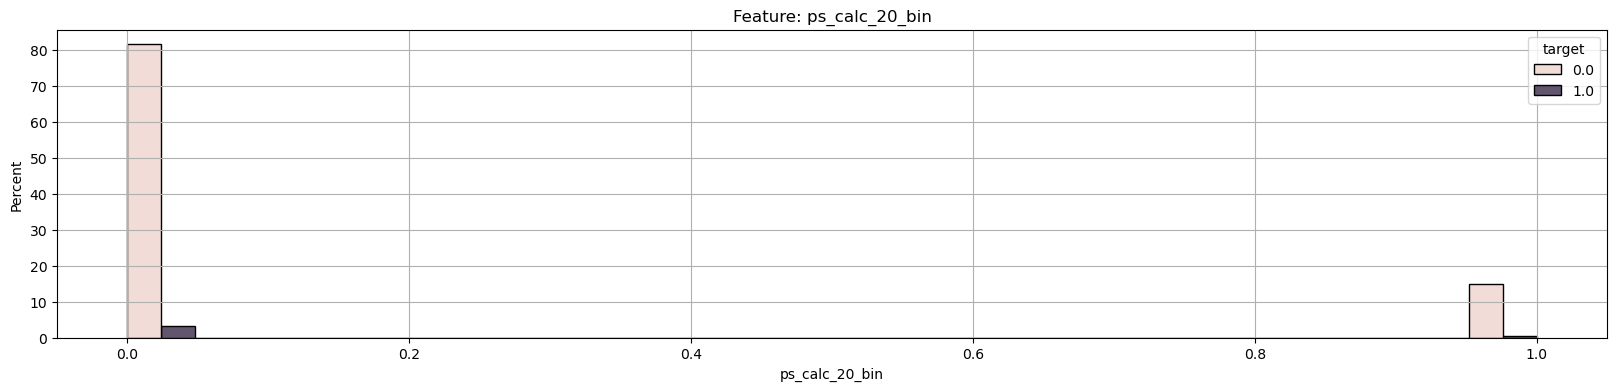

In [15]:
_maxlen = max([len(c) for c in calc_features])

for c in calc_features:
    print(f"Feature: {c.ljust(_maxlen)}\tvalues: {len(set(full[c]))}")
    
for c in calc_features:
    f, ax = plt.subplots(1, 1, figsize=(20, 4))
    sns.histplot(full, x=c, ax=ax, hue=LABEL, multiple="dodge", stat="percent")
    ax.grid()
    ax.set_title(f"Feature: {c.ljust(_maxlen)}")
    if SAVE_PLOTS:
        plt.savefig(PLOT_DIR.joinpath(f"BarPlot-{c}-Frequency-by-Label.png"))
    plt.show()

Categorical Feature: ps_ind_02_cat 	values: 5
Categorical Feature: ps_ind_04_cat 	values: 3
Categorical Feature: ps_ind_05_cat 	values: 8
Categorical Feature: ps_car_01_cat 	values: 13
Categorical Feature: ps_car_02_cat 	values: 3
Categorical Feature: ps_car_03_cat 	values: 3
Categorical Feature: ps_car_04_cat 	values: 10
Categorical Feature: ps_car_05_cat 	values: 3
Categorical Feature: ps_car_06_cat 	values: 18
Categorical Feature: ps_car_07_cat 	values: 3
Categorical Feature: ps_car_08_cat 	values: 2
Categorical Feature: ps_car_09_cat 	values: 6
Categorical Feature: ps_car_10_cat 	values: 3
Categorical Feature: ps_car_11_cat 	values: 104


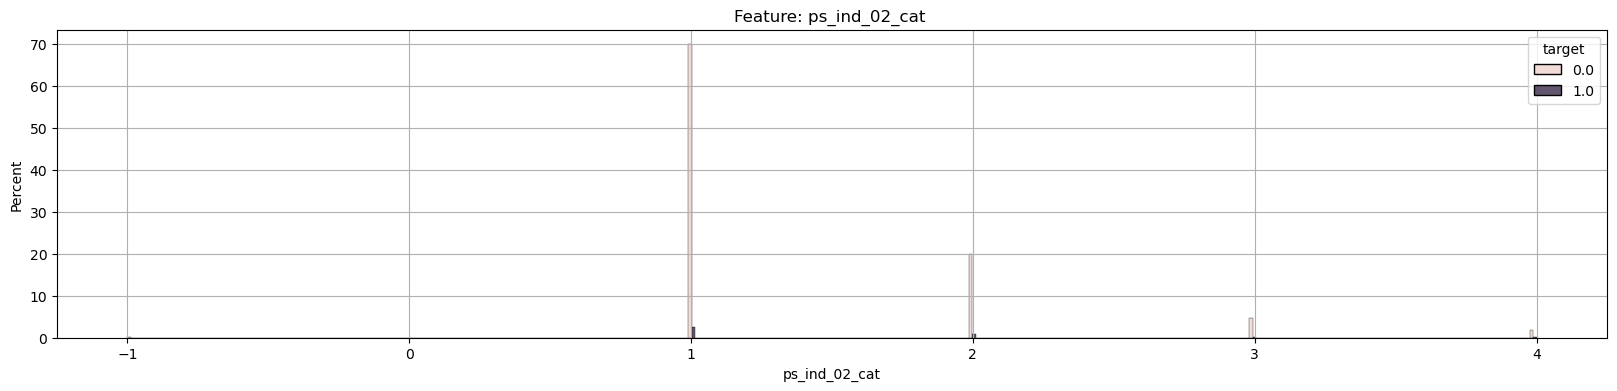

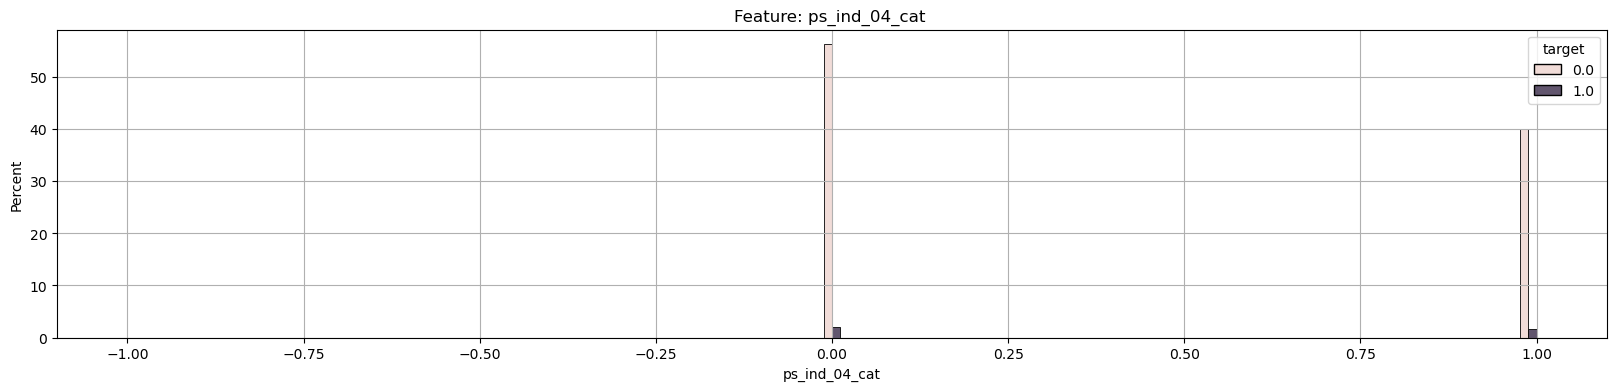

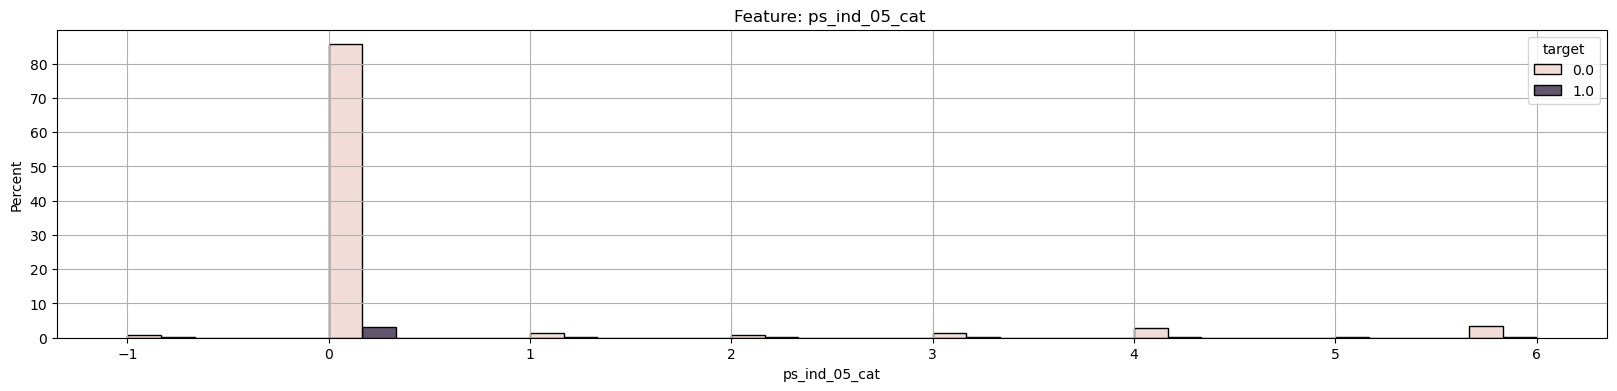

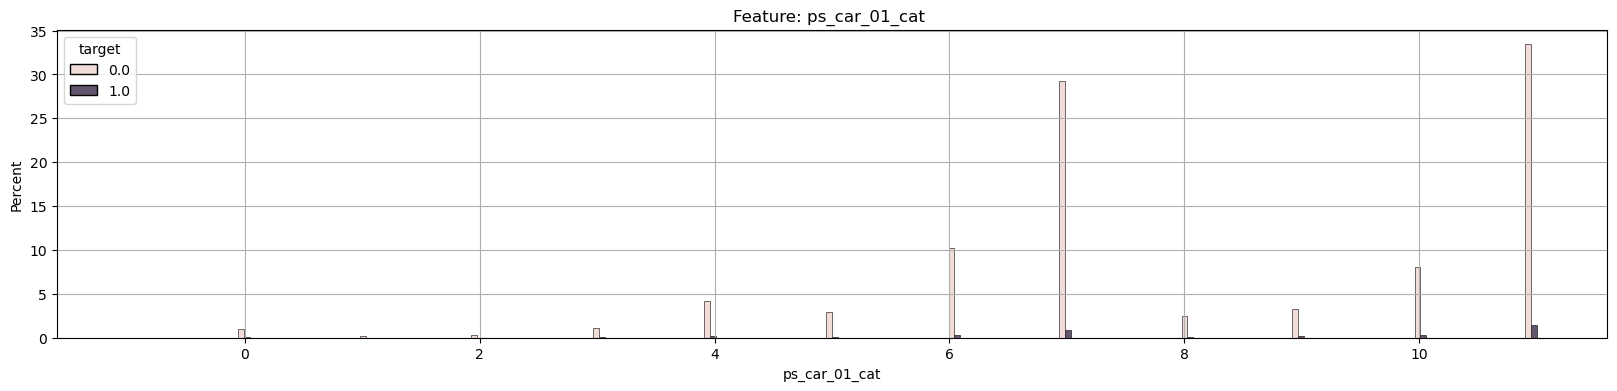

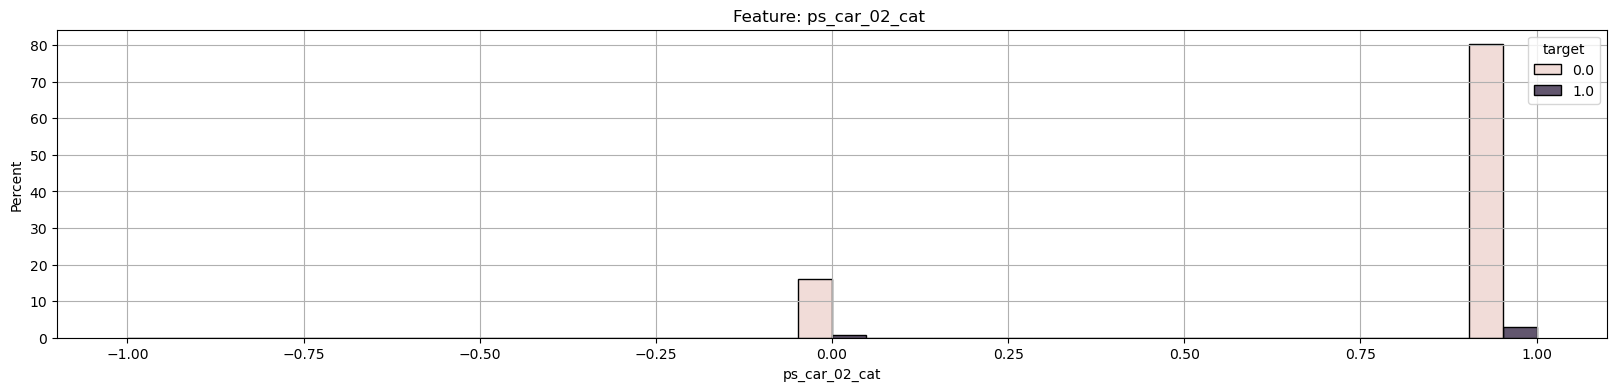

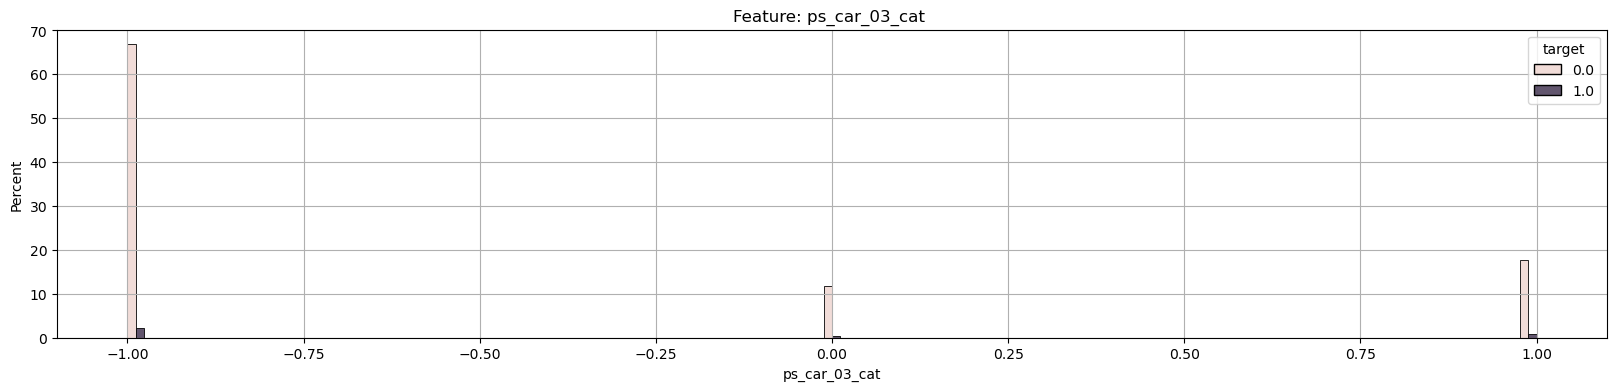

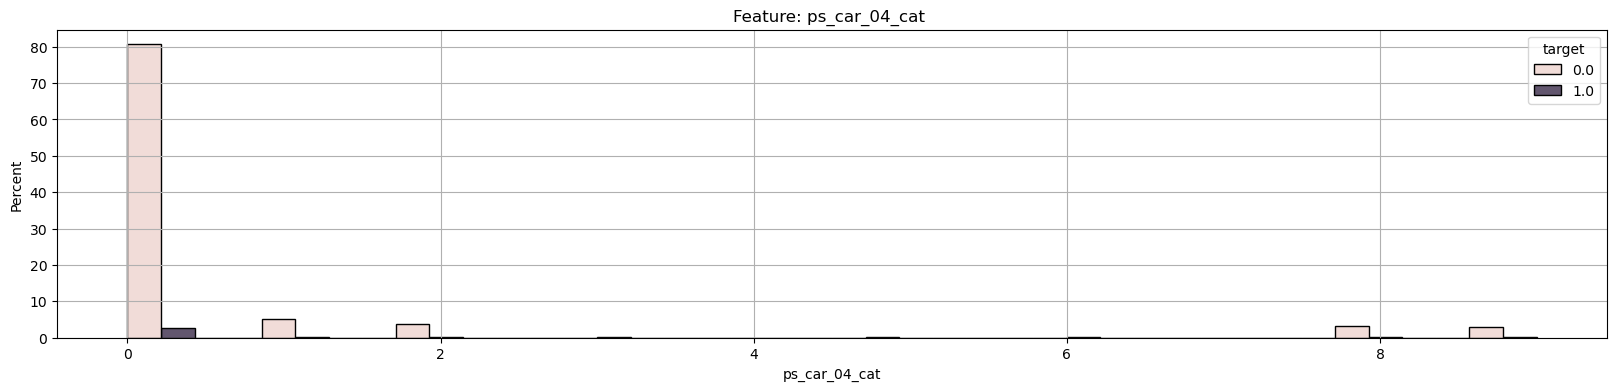

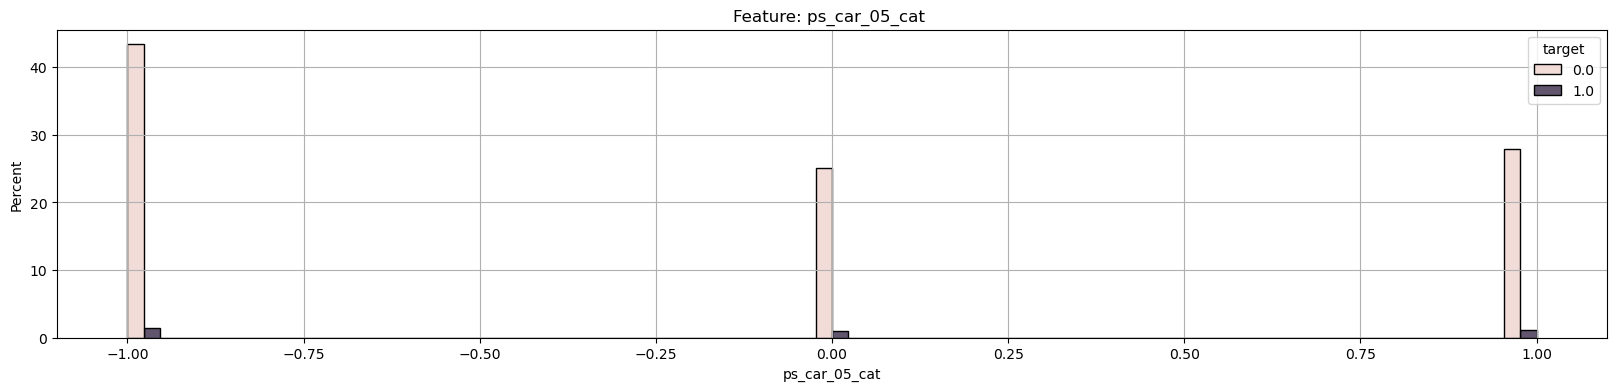

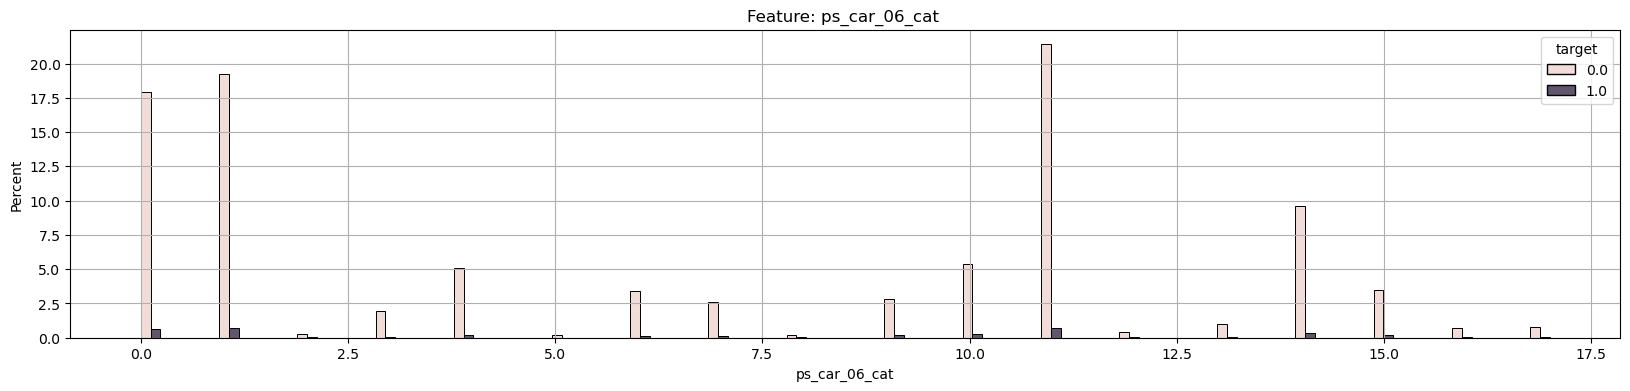

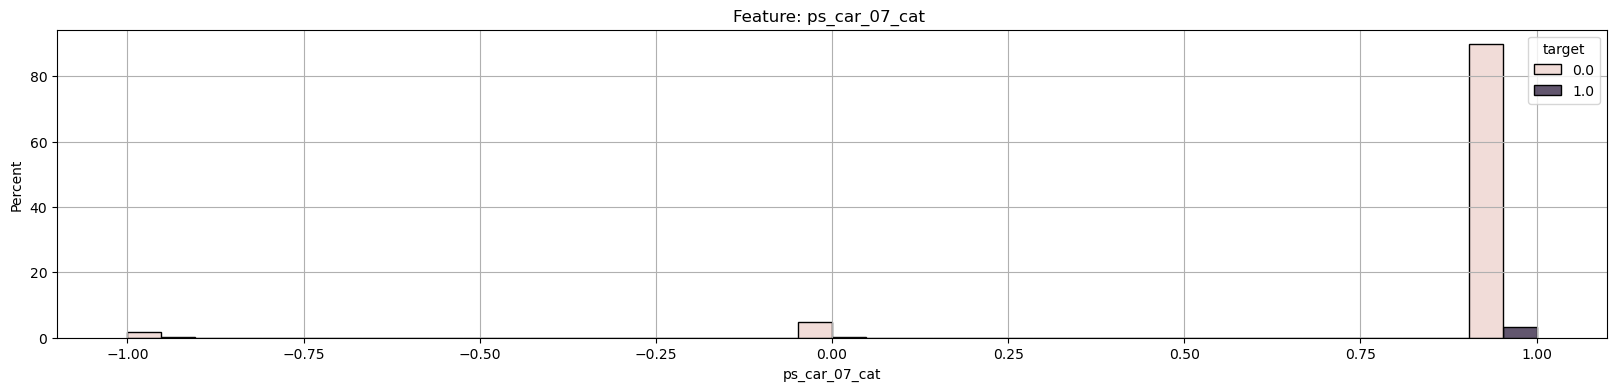

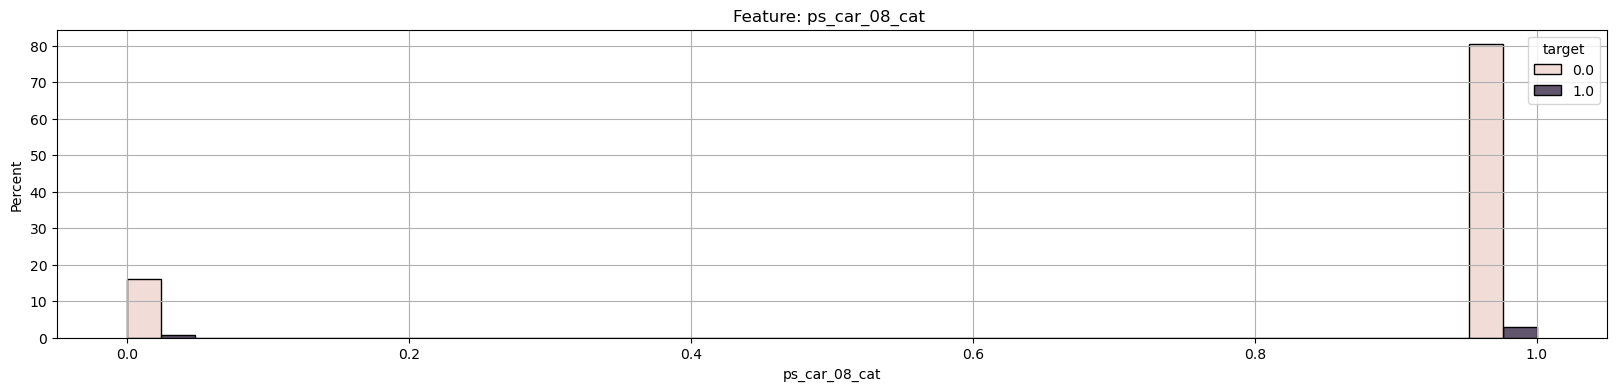

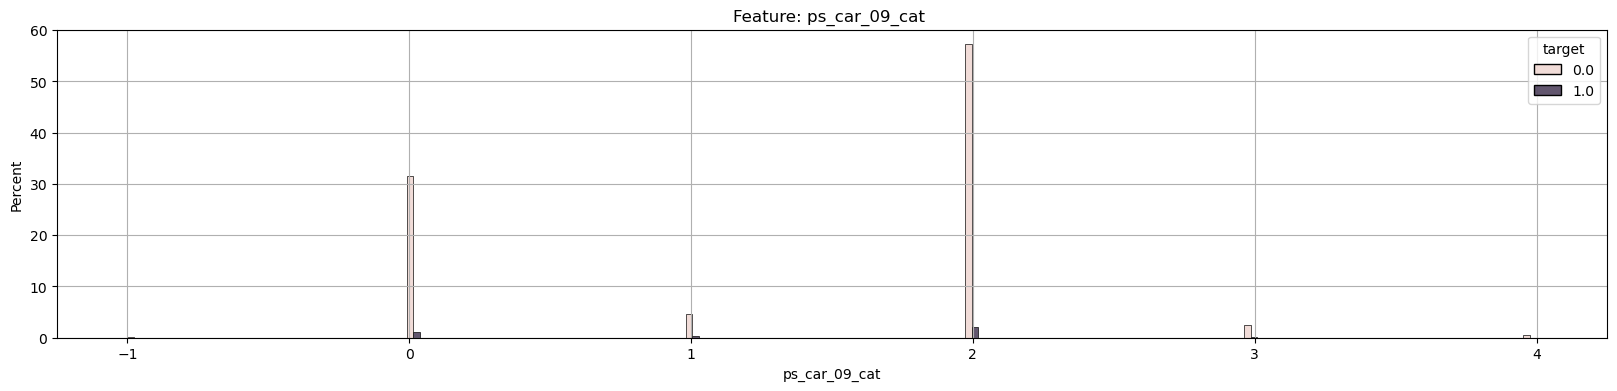

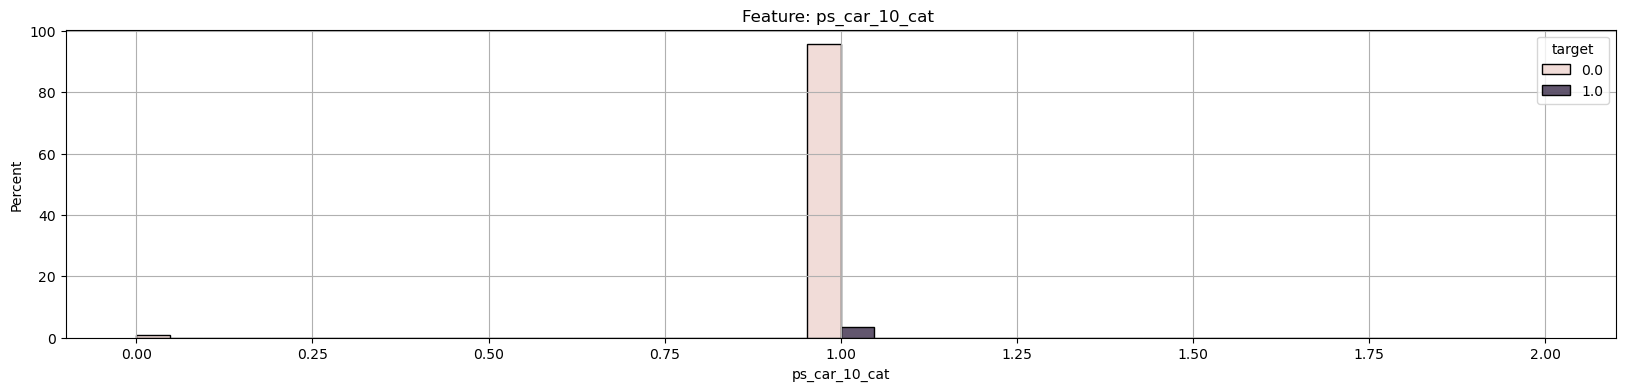

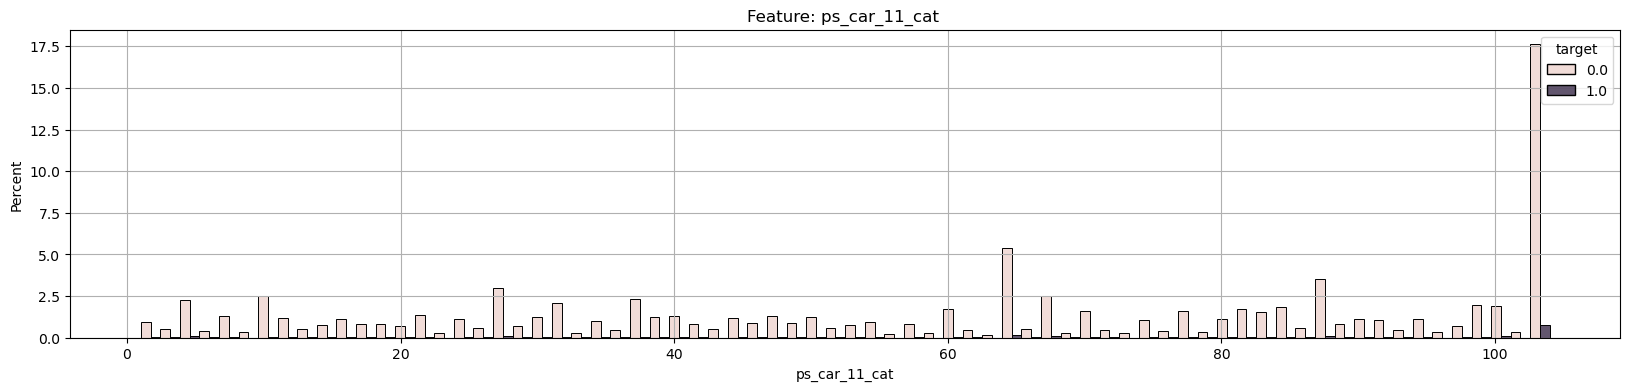

In [16]:
for c in cat_features:
    print(f"Categorical Feature: {c.ljust(_maxlen)}\tvalues: {len(set(full[c]))}")

for c in cat_features:
    f, ax = plt.subplots(1, 1, figsize=(20, 4))
    sns.histplot(full, x=c, ax=ax, hue=LABEL, multiple="dodge", stat="percent")
    ax.grid()
    ax.set_title(f"Feature: {c.ljust(_maxlen)}")
    if SAVE_PLOTS:
        plt.savefig(PLOT_DIR.joinpath(f"BarPlot-Categorical-{c}-Frequency-by-Label.png"))
    plt.show()

### Binary Features

- Evaluate Binary Feature relationship to target variable with densisty plots
- Calc binary feature distributions are identical across LABEL

<Figure size 640x480 with 0 Axes>

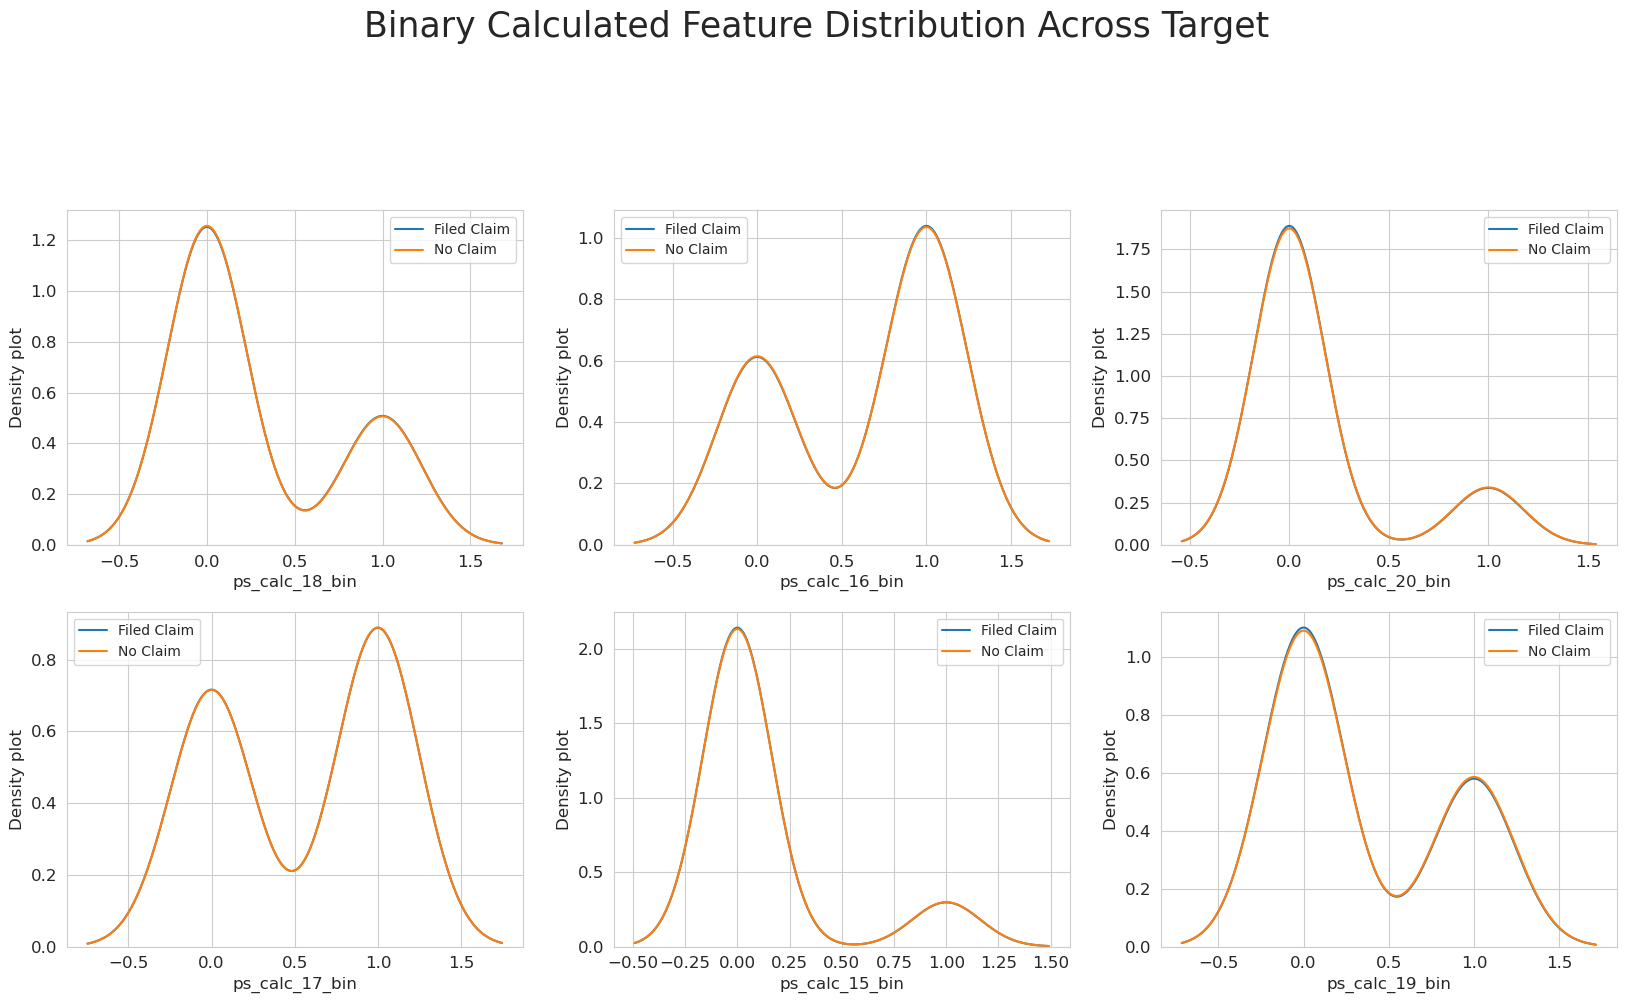

In [58]:
bin_calc_features = list(set(binary_features).intersection(set(calc_features)))

plt.figure()
fig, ax = plt.subplots(figsize=(20, 20))
plt.suptitle("Binary Calculated Feature Distribution Across Target", fontsize=25)

for i, feature in enumerate(bin_calc_features):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(full[full[LABEL] == 1][feature], bw=0.5, label="Filed Claim")
    sns.kdeplot(full[full[LABEL] == 0][feature], bw=0.5, label="No Claim")
    plt.legend(loc='best')
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

if SAVE_PLOTS:
    fname = f"Binary-Density-Calculated-Features.png"
    plt.savefig(PLOT_DIR.joinpath(fname))
    plt.show()

<Figure size 640x480 with 0 Axes>

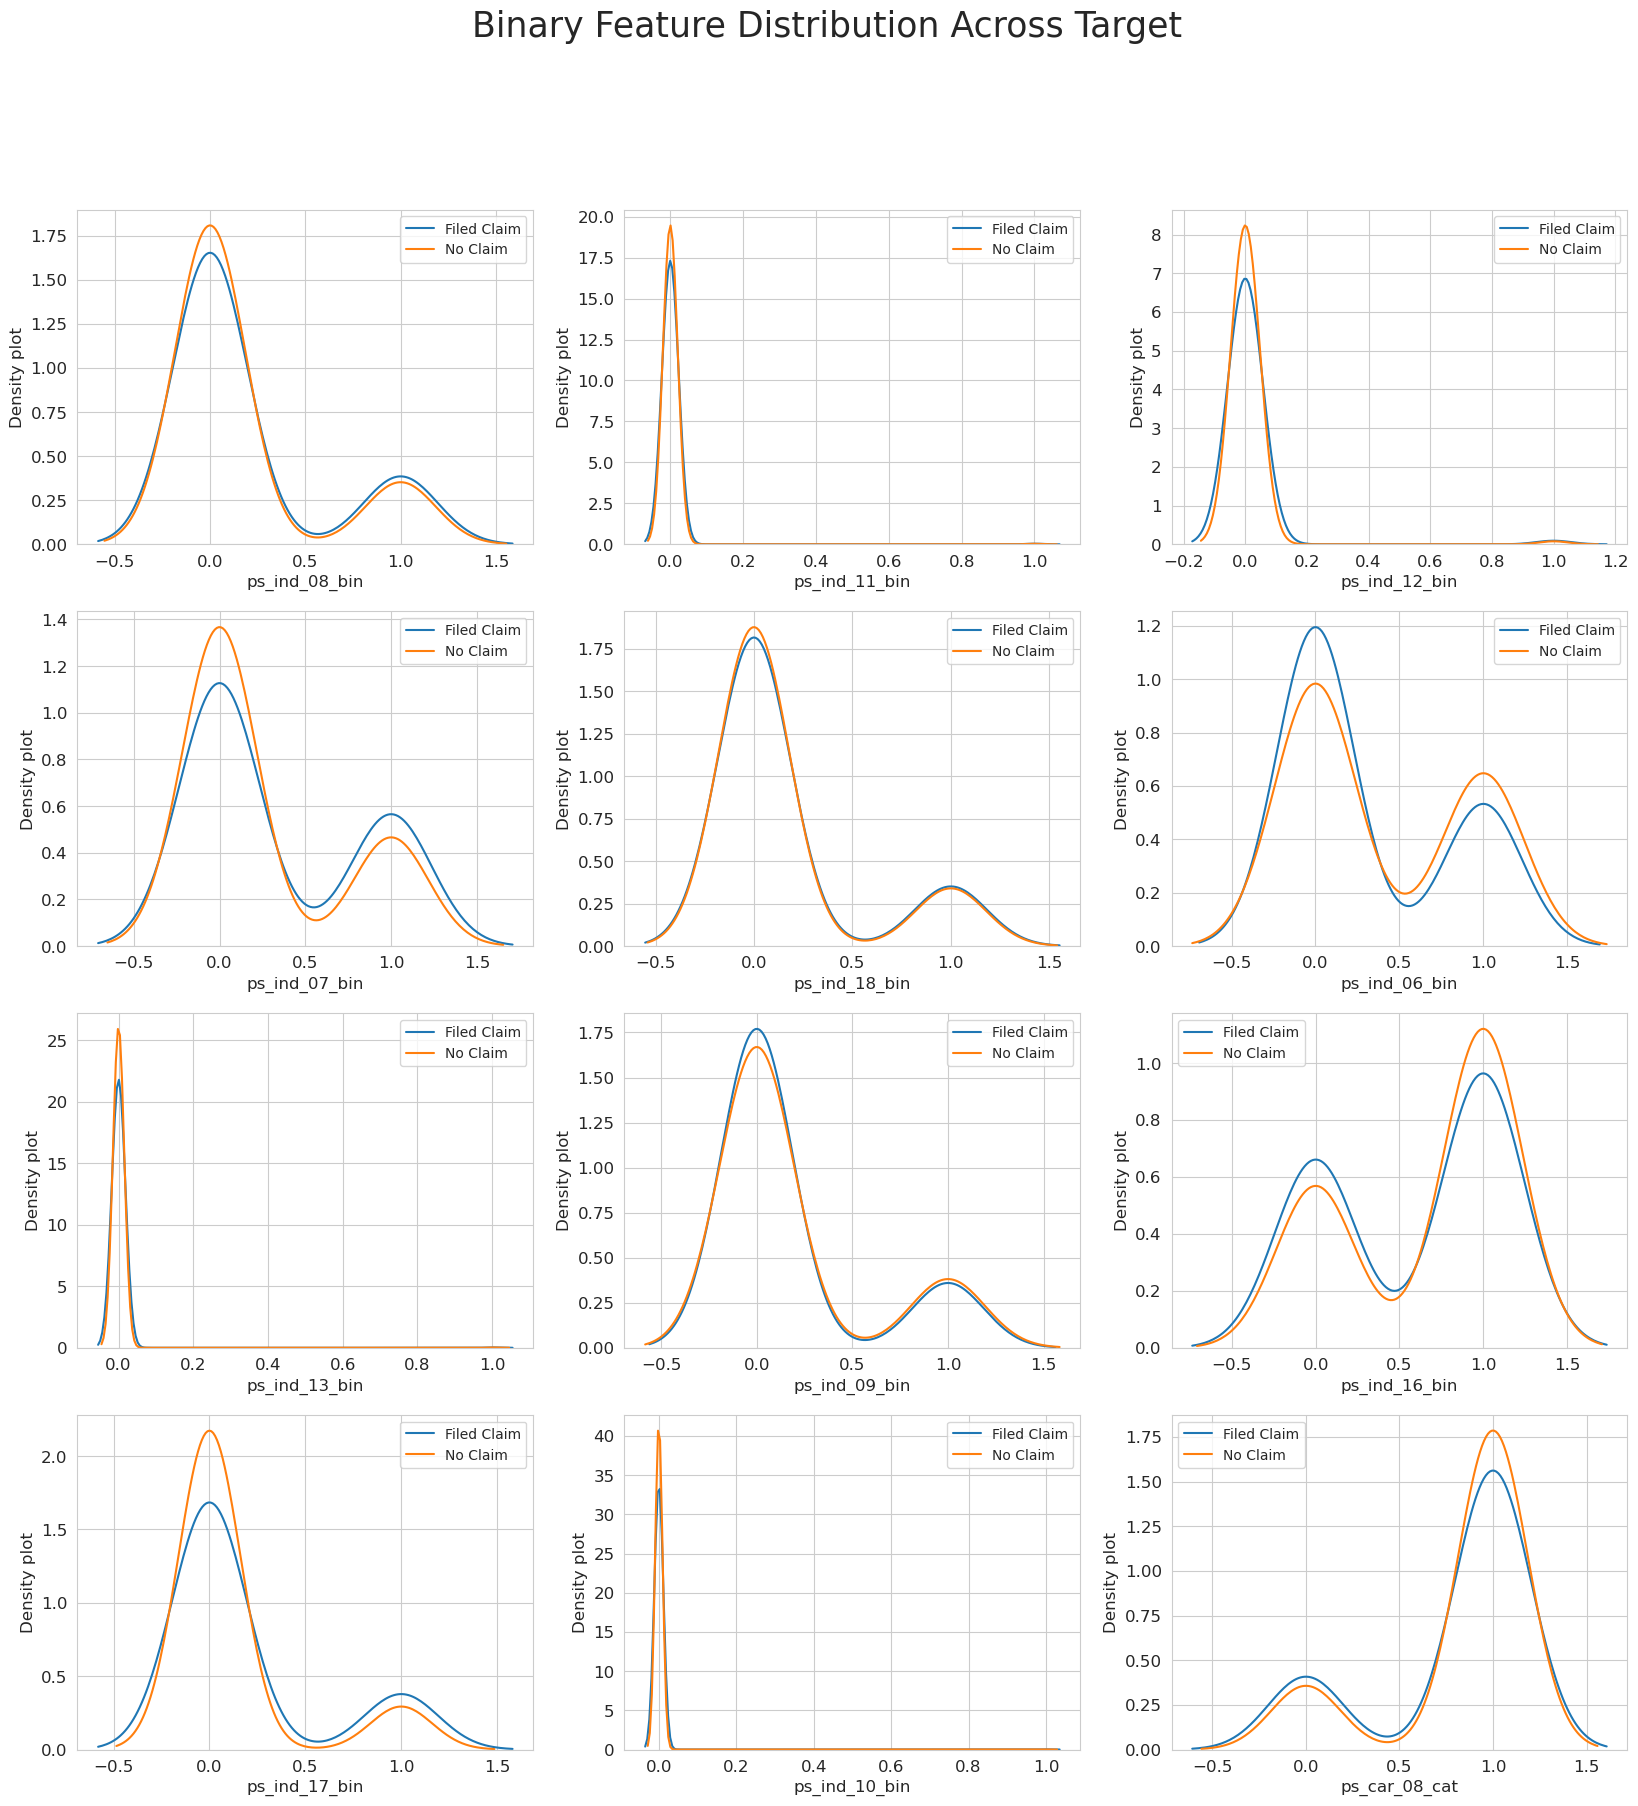

In [69]:
plt.figure()
fig, ax = plt.subplots(figsize=(20, 20))
plt.suptitle("Binary Feature Distribution Across Target", fontsize=25)

bin_feats = list(set(binary_features) - set(calc_features))

for i, feature in enumerate(bin_feats):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(full[full[LABEL] == 1][feature], bw=0.5, label="Filed Claim")
    sns.kdeplot(full[full[LABEL] == 0][feature], bw=0.5, label="No Claim")
    plt.legend(loc='best')
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)

if SAVE_PLOTS:
    fname = f"Binary-Density-Features.png"
    plt.savefig(PLOT_DIR.joinpath(fname))
    plt.show()

### Features to Eliminate

- Lots of noisy features that don't appear to have any relation to the target variable
    
    - `calc_columns`

In [71]:
RM_FEATURES = calc_features + [LABEL, "id"]

FIT_FEATURES = [f for f in features if f not in RM_FEATURES]

In [102]:
# %%time

# %run src/process.py
# %run src/baseline.py
# %run src/score.py